In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns
import sklearn

In [9]:
df_complete = pd.read_csv('dados.csv', sep=',')

# LIMPEZA #

In [10]:
# Verificando a existência de duplicatas
df_complete[df_complete.duplicated()]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,2.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [11]:
# Remoção das duplicatas
df_sem_duplicata = df_complete.drop_duplicates()
df_sem_duplicata

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [12]:
# Verificando a existência de dados nulos
df_sem_duplicata.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### Nenhum foi encontrado e, portanto, o dataframe não foi modificado

In [13]:
df_sem_duplicata.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# OUTLIERS

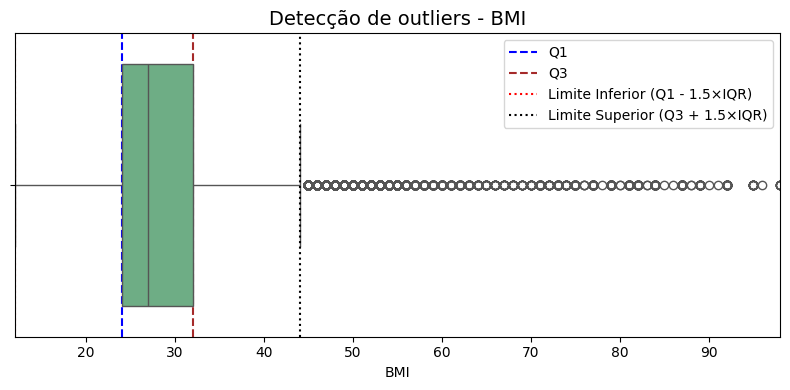

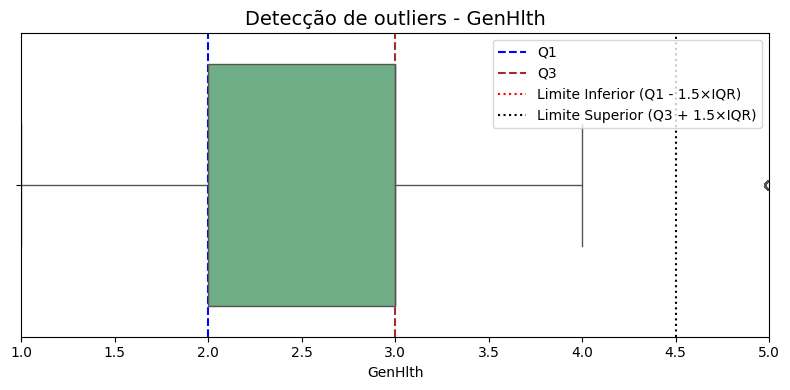

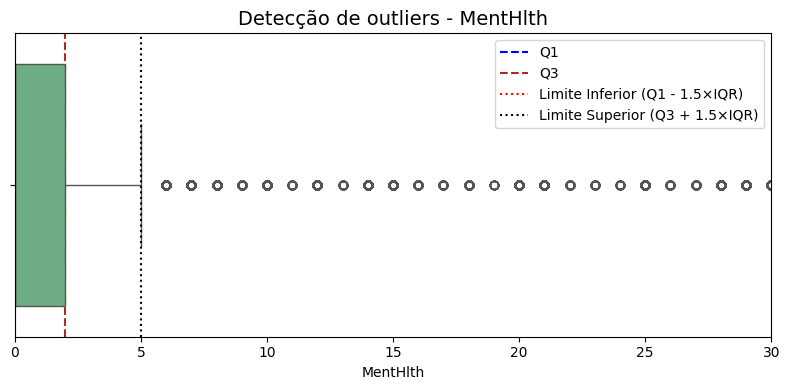

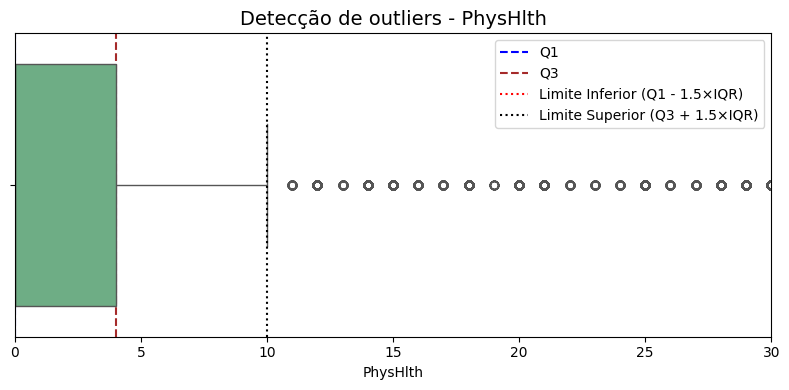

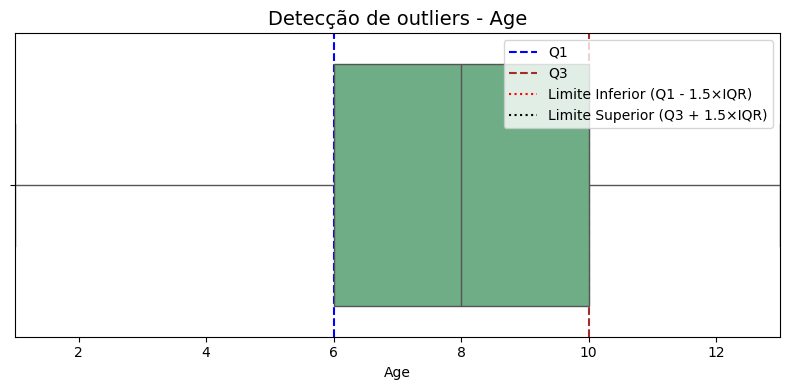

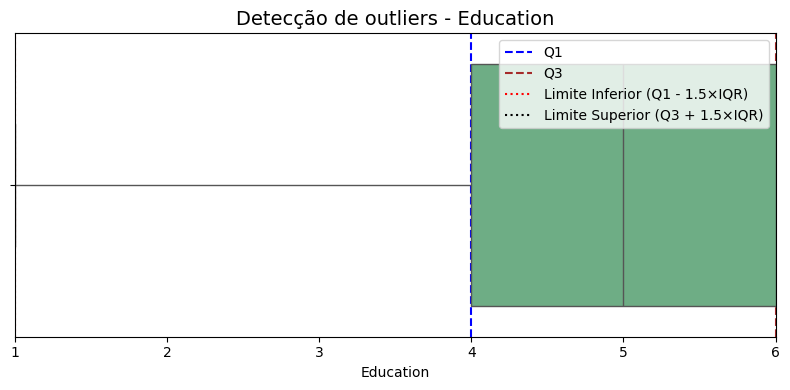

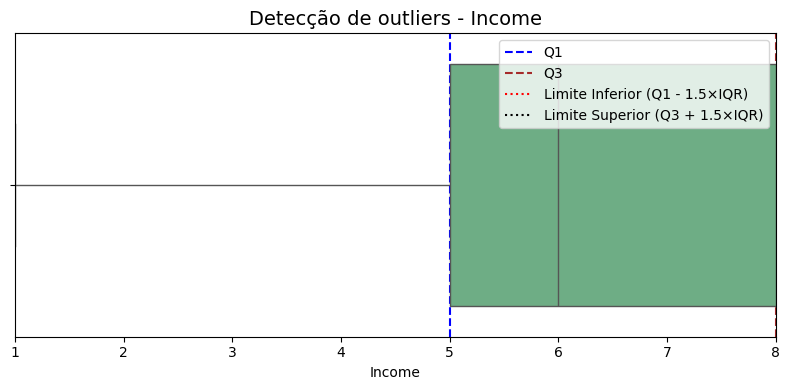

In [14]:
# A verificação de outliers se dará para os atributos não binários
atributos_nbin = ['BMI','GenHlth','MentHlth','PhysHlth','Age','Education',
                  'Income']
df_atributos_nbin = df_sem_duplicata[atributos_nbin]

# Detecção de outliers baseada em quantis
## De acordo com Tukey (1977) e Bruce, Bruce & Gedeck (2020):
## Valores abaixo de Q1 - 1.5 * IQR podem ser considerados outliers inferiores e
## Valores acima de Q3 + 1.5 * IQR podem ser considerados outliers superiores

# Loop sobre todas as colunas de atributos nbin
for coluna in df_atributos_nbin.columns:

    Q1 = df_atributos_nbin[coluna].quantile(0.25) # Primeiro quantil
    Q3 = df_atributos_nbin[coluna].quantile(0.75) # Terceiro quantil
    IQR = Q3 - Q1 # InterQuartile Range

    limite_inferior = Q1 - 1.5 * IQR # Outliers inferiores
    limite_superior = Q3 + 1.5 * IQR # Outliers superiores

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_atributos_nbin[coluna], color='#63b882')

    plt.axvline(Q1, color='blue', linestyle='--', label='Q1')
    plt.axvline(Q3, color='brown', linestyle='--', label='Q3')
    plt.axvline(limite_inferior, color='red', linestyle=':', label='Limite Inferior (Q1 - 1.5×IQR)')
    plt.axvline(limite_superior, color='black', linestyle=':', label='Limite Superior (Q3 + 1.5×IQR)')

    minimo = df_atributos_nbin[coluna].min() #valor min do atributo
    maximo = df_atributos_nbin[coluna].max() #valor max do atributo
    plt.xlim(minimo, maximo)

    plt.title(f'Detecção de outliers - {coluna}', fontsize=14)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig(f'outliers_nbin{coluna}.png')
    plt.show()

In [15]:
# Remoção dos outliers

Q1 = df_atributos_nbin.quantile(0.25) # Primeiro quantil
Q3 = df_atributos_nbin.quantile(0.75) # Terceiro quantil
IQR = Q3 - Q1 # InterQuartile Range

limite_inferior = Q1 - 1.5 * IQR # Outliers inferiores
limite_superior = Q3 + 1.5 * IQR # Outliers superiores

outliers = df_atributos_nbin[
    (df_atributos_nbin < limite_inferior) | (df_atributos_nbin > limite_superior)]

# Gerando um dataframe sem outliers
df_sem_outliers = df_sem_duplicata.copy()

# Loop em todas as colunas do dataframe sem duplicatas
for coluna in outliers.columns:

    # Removendo NaN (linhas para não outliers)
    outliers_coluna = outliers[coluna].dropna().unique()

    # Dentro de 'coluna' se o valor de uma linha for igual a de uma linha considerada outlier (igual de outliers_coluna)
    # Então essa linha será removida
    # Uso do operador lógico ~ (restando só o que NÃO é outlier)

    df_sem_outliers = df_sem_outliers[~df_sem_outliers[coluna].isin(outliers_coluna)]

df_sem_outliers
#outliers.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


### BALANCEAMENTO

In [31]:
# PRIMEIRO PASSO: BALANCEAMENTO DAS CLASSES
#0: não dibético; 1: pré-diabético; 2: diabético

# Verificando a distribuição das classes:
df_sem_outliers.loc[:, 'Diabetes_012']
counts_classe = df_sem_outliers.loc[:, 'Diabetes_012'].value_counts()
print(counts_classe)

Diabetes_012
0.0    144457
2.0     21224
1.0      3062
Name: count, dtype: int64


In [32]:
# Dado o deslanceamento das classes e o grande número de dados que possuimos, optou-se
# Pela ténica undersampling

# Selecionando aleatoriamente 3060 elementos de cada classe
df_0 = df_sem_outliers[df_sem_outliers['Diabetes_012'] == 0.0].sample(n=3060, random_state=42)
df_1 = df_sem_outliers[df_sem_outliers['Diabetes_012'] == 1.0].sample(n=3060, random_state=42)
df_2 = df_sem_outliers[df_sem_outliers['Diabetes_012'] == 2.0].sample(n=3060, random_state=42)

# Concatenando as novas colunas e deletando a antiga (desbalanceada)
# O comando sample(frac=1, random_state=42) garante o embarelhamento das linhas após o concatenamento

df_classes_under = pd.concat([df_0, df_1, df_2], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
#df_classes_under.head()
#df_classes_under

/tmp/ipykernel_5322/2341316672.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sem_duplicata, x='Diabetes_012', palette=paleta)
/tmp/ipykernel_5322/2341316672.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(data=df_sem_duplicata, x='Diabetes_012', palette=paleta)
/tmp/ipykernel_5322/2341316672.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_classes_under, x='Diabetes_012', palette=paleta)
/tmp/ipykernel_5322/2341316672.py:15: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(data=df_classes_under, x='Diabetes_012', palette=paleta)


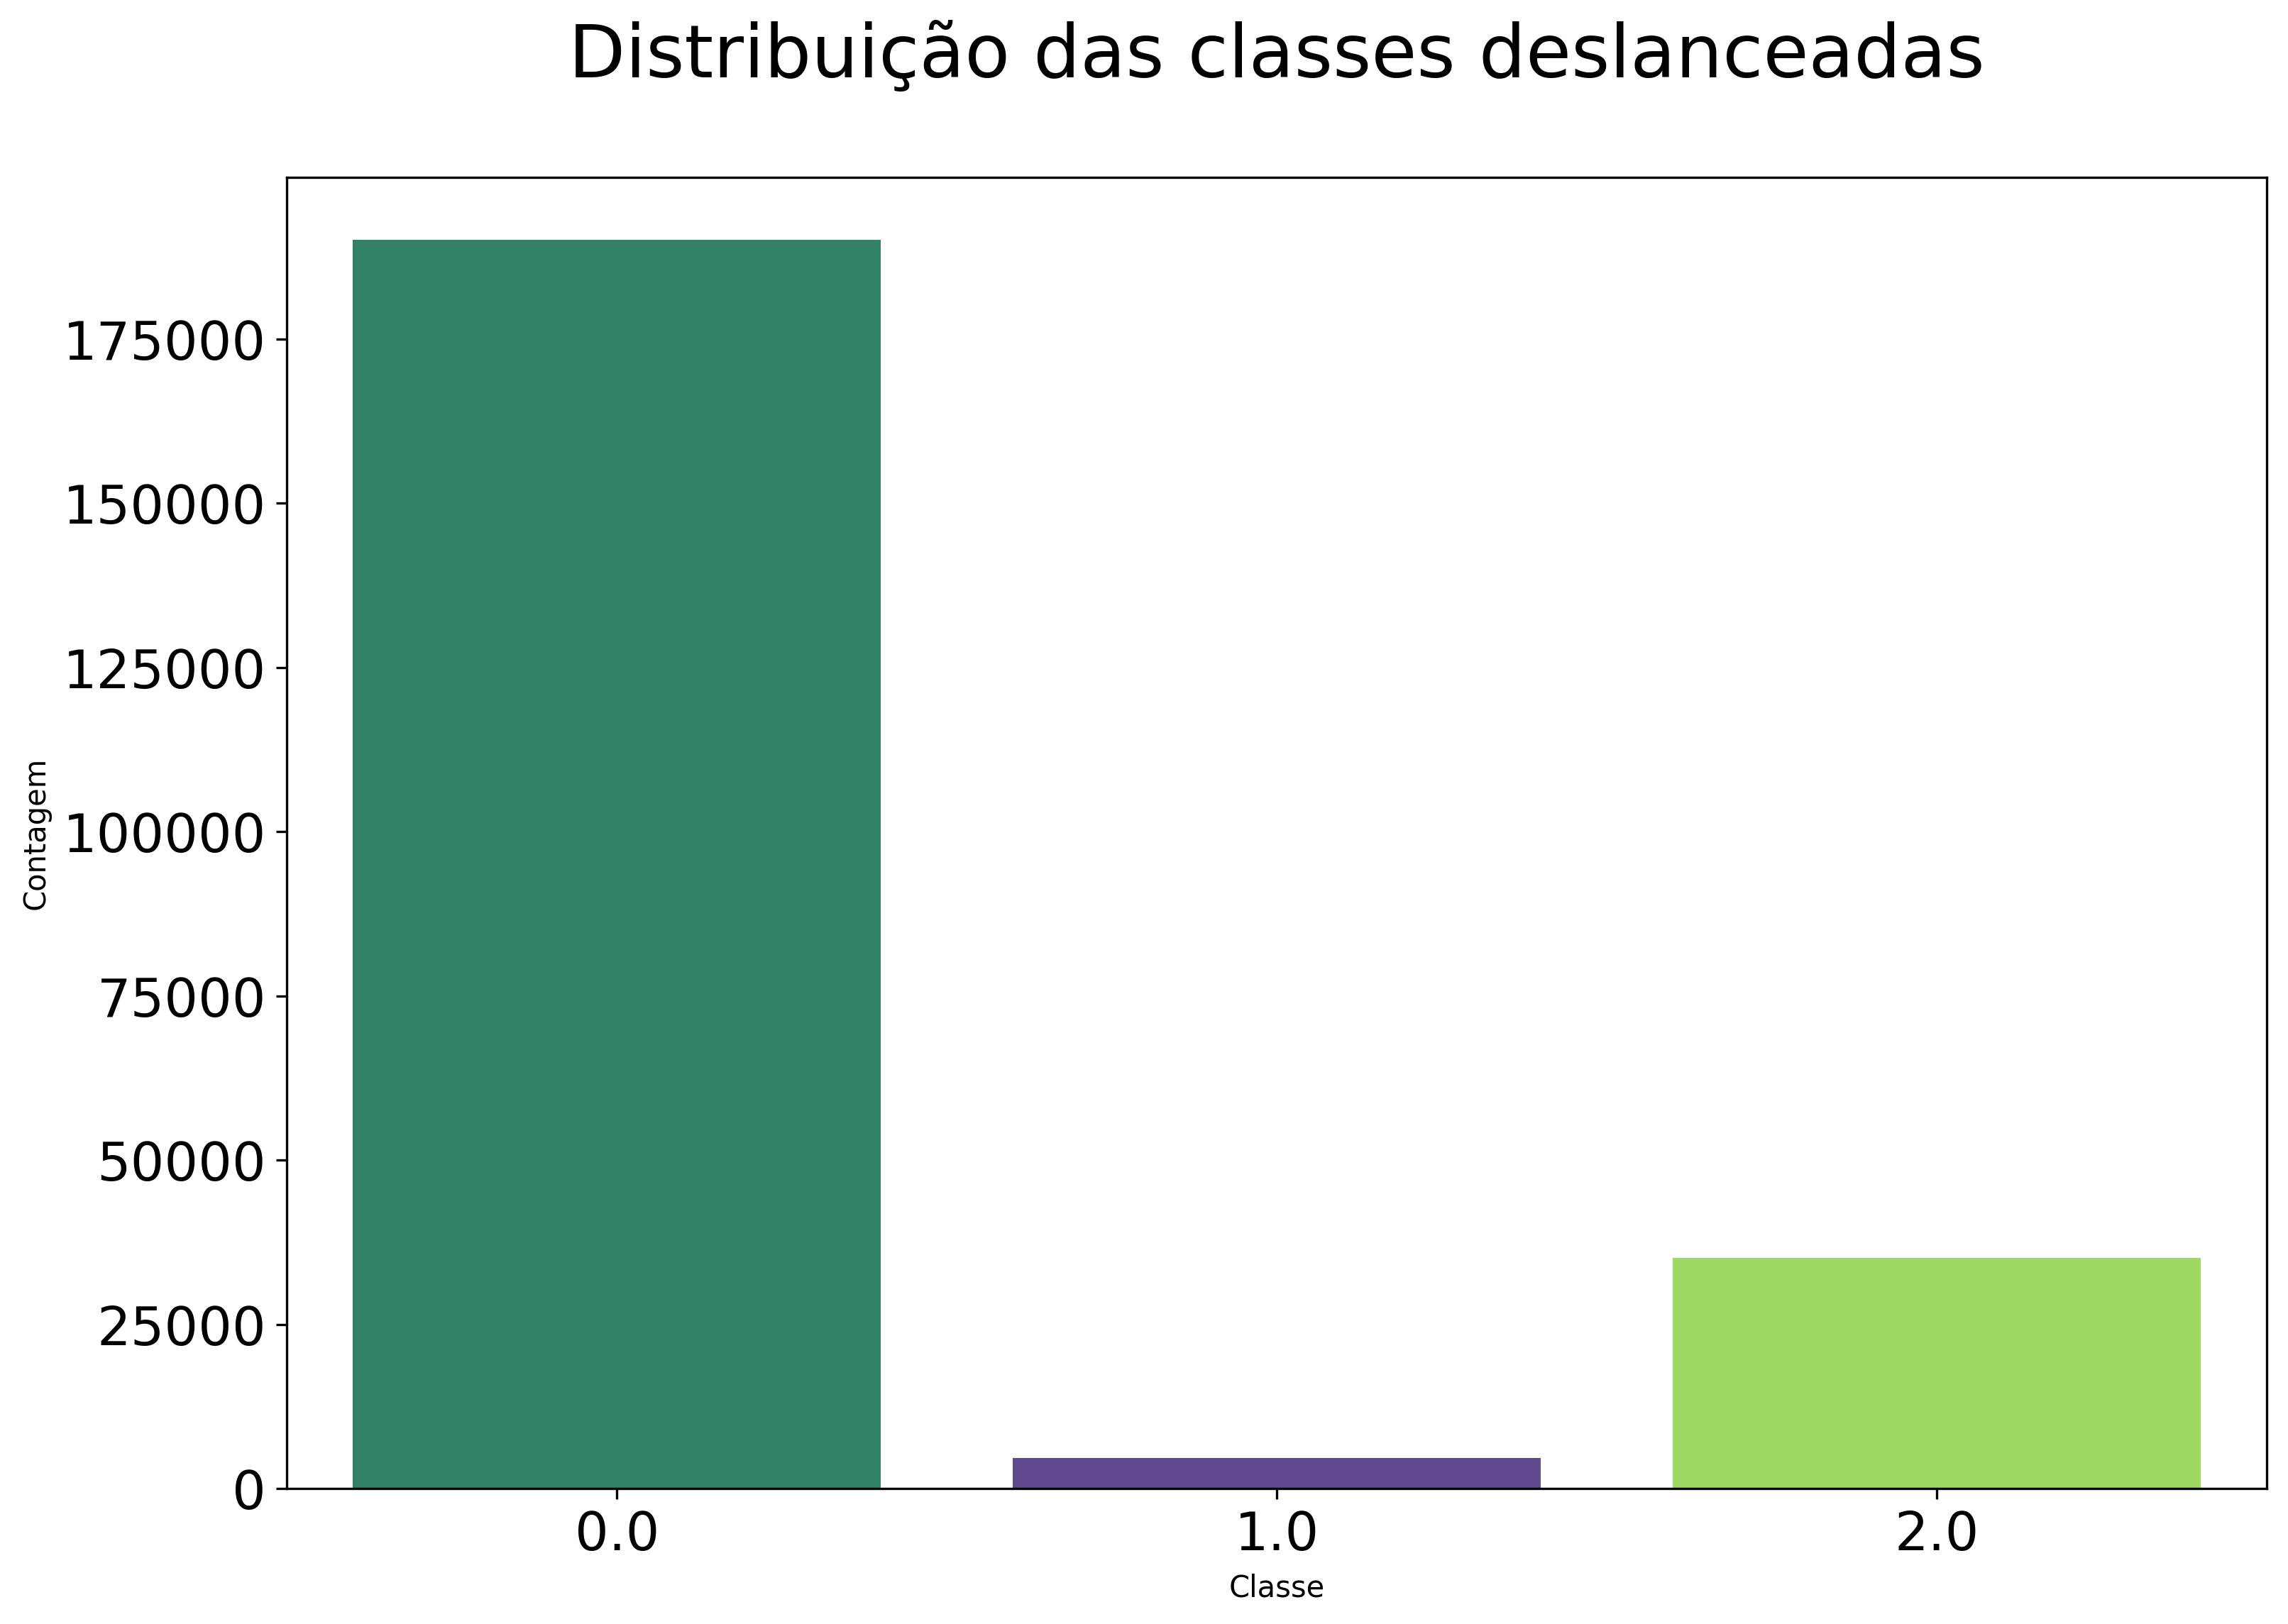

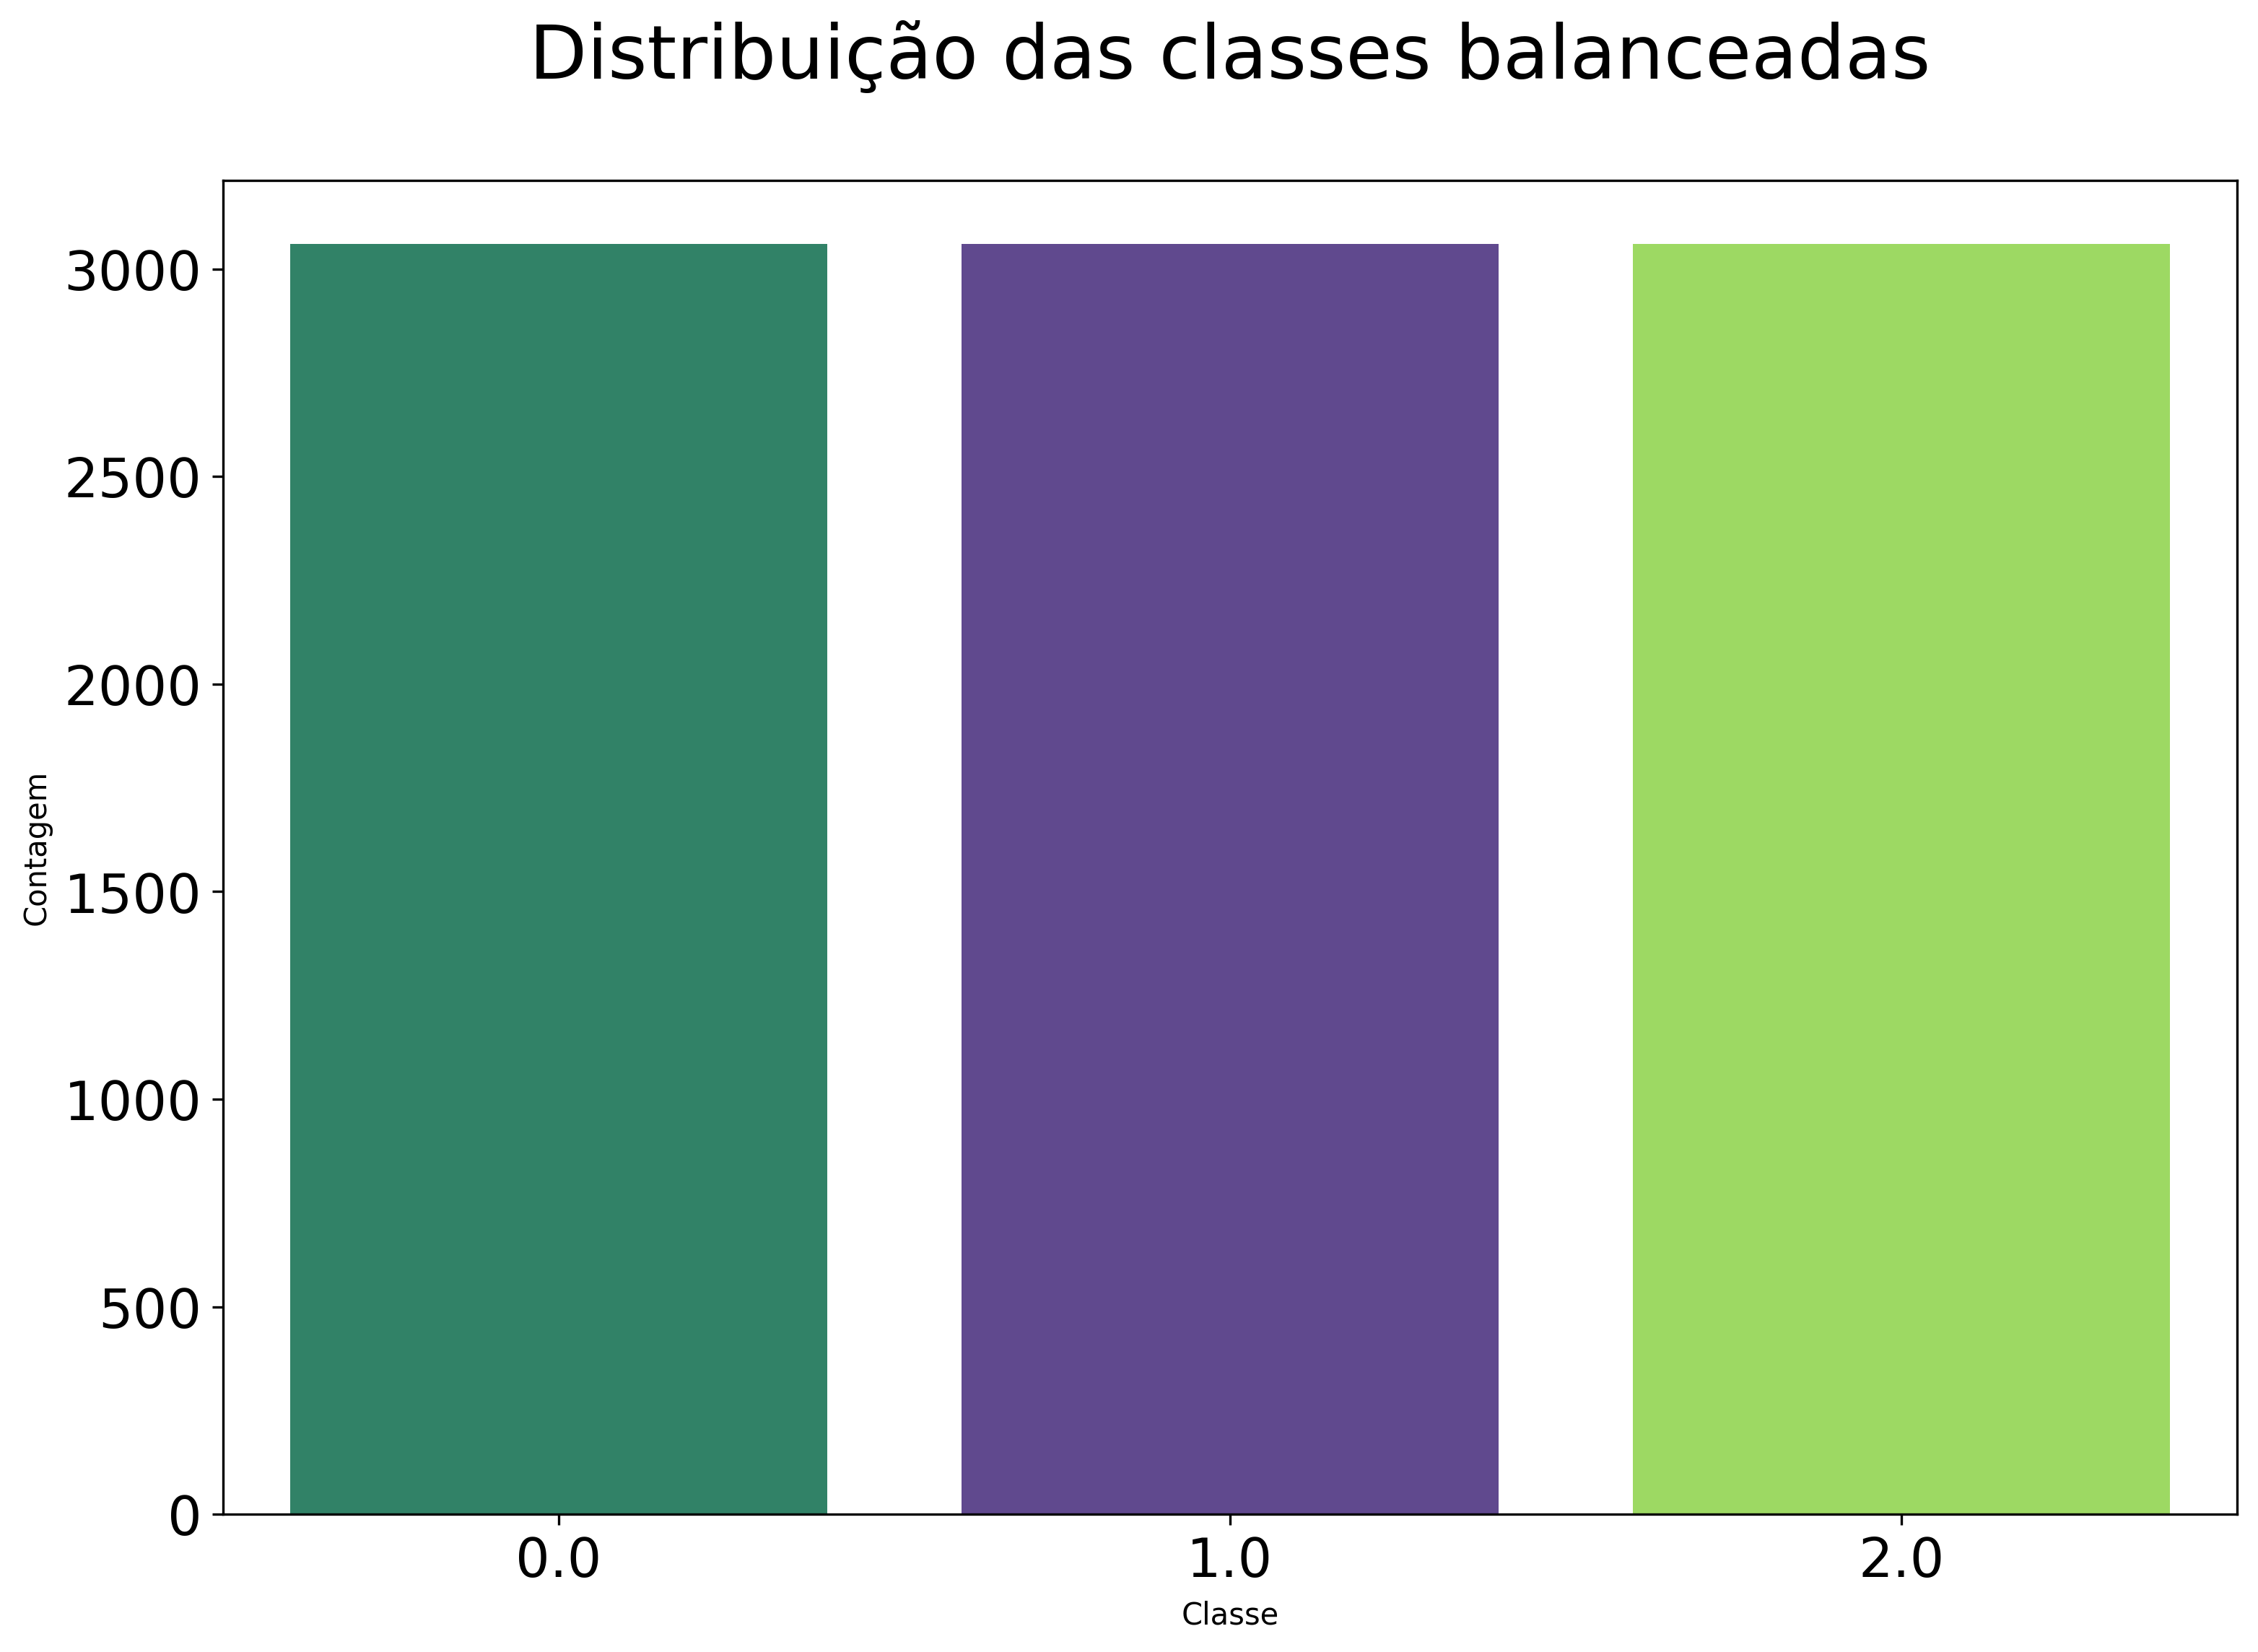

In [51]:
# Plotando a contagem das classes antes e depois do balanceamento

paleta = ['#248f6c', '#5c3d99', '#9cec50', '#C8378B', '#3d2b1f', '#16B8E9', '#4AB584', '#e8638e', '#1636E9','#44BBB9']

plt.figure(figsize=(12, 8), dpi=300)
sns.countplot(data=df_sem_duplicata, x='Diabetes_012', palette=paleta)
plt.title("Distribuição das classes deslanceadas\n", fontsize=25)
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('contagem_classes_des.png',dpi=300)

plt.figure(figsize=(12, 8), dpi=300)
sns.countplot(data=df_classes_under, x='Diabetes_012', palette=paleta)
plt.title("Distribuição das classes balanceadas\n", fontsize=25)
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('contagem_classes_bal.png',dpi=300)

In [52]:
# SEGUNDO PASSO: BALANCEAMENTO DOS ATRIBUTOS BINÁRIOS

# Verificando dados estatísticos do dataframe
# Para variáveis binárias, observamos o valor médio e o desvio padrão
# Valores médios próximos de 0 ou 1 indicam desbalanceamento
# Desvios padrões próximos baixos indicam baixa variabilidade (máx = 0.5)

atributos_bin = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
           'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
           'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
           'DiffWalk', 'Sex']

df_classes_under[atributos_bin].describe()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
count,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000
mean,0.563290,0.539542,0.977015,0.458497,0.043464,0.114270,0.743900,0.613072,0.784749,0.042919,0.955338,0.069063,0.147712,0.486383
std,0.496005,0.498461,0.149863,0.498302,0.203910,0.318156,0.436502,0.487073,0.411018,0.202686,0.206573,0.253575,0.354834,0.499842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# Removendo as variáveis binárias desbalanceadas
bin_remove = [
    'CholCheck', 'Stroke', 'HeartDiseaseorAttack',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

df_balanceado_bin = df_classes_under.drop(columns=bin_remove)
df_balanceado_bin.describe()

,Diabetes_012,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,Sex,Age,Education,Income
count,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000
mean,1.000000,0.563290,0.539542,29.238671,0.458497,0.743900,0.613072,0.784749,2.576035,0.525054,1.124183,0.486383,8.904031,4.931264,5.907843
std,0.816541,0.496005,0.498461,5.425204,0.498302,0.436502,0.487073,0.411018,0.864872,1.258904,2.317166,0.499842,2.810003,1.012915,2.015087
min,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,7.000000,4.000000,5.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,2.000000,1.000000,1.000000,33.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000,10.000000,1.000000,13.000000,6.000000,8.000000


/tmp/ipykernel_5322/3572739888.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_atributos_nbin, x=df_atributos_nbin[coluna], palette=paleta)
/tmp/ipykernel_5322/3572739888.py:9: UserWarning: 
The palette list has fewer values (10) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df_atributos_nbin, x=df_atributos_nbin[coluna], palette=paleta)
/tmp/ipykernel_5322/3572739888.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_atributos_nbin, x=df_atributos_nbin[coluna], palette=paleta)
/tmp/ipykernel_5322/3572739888.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.c

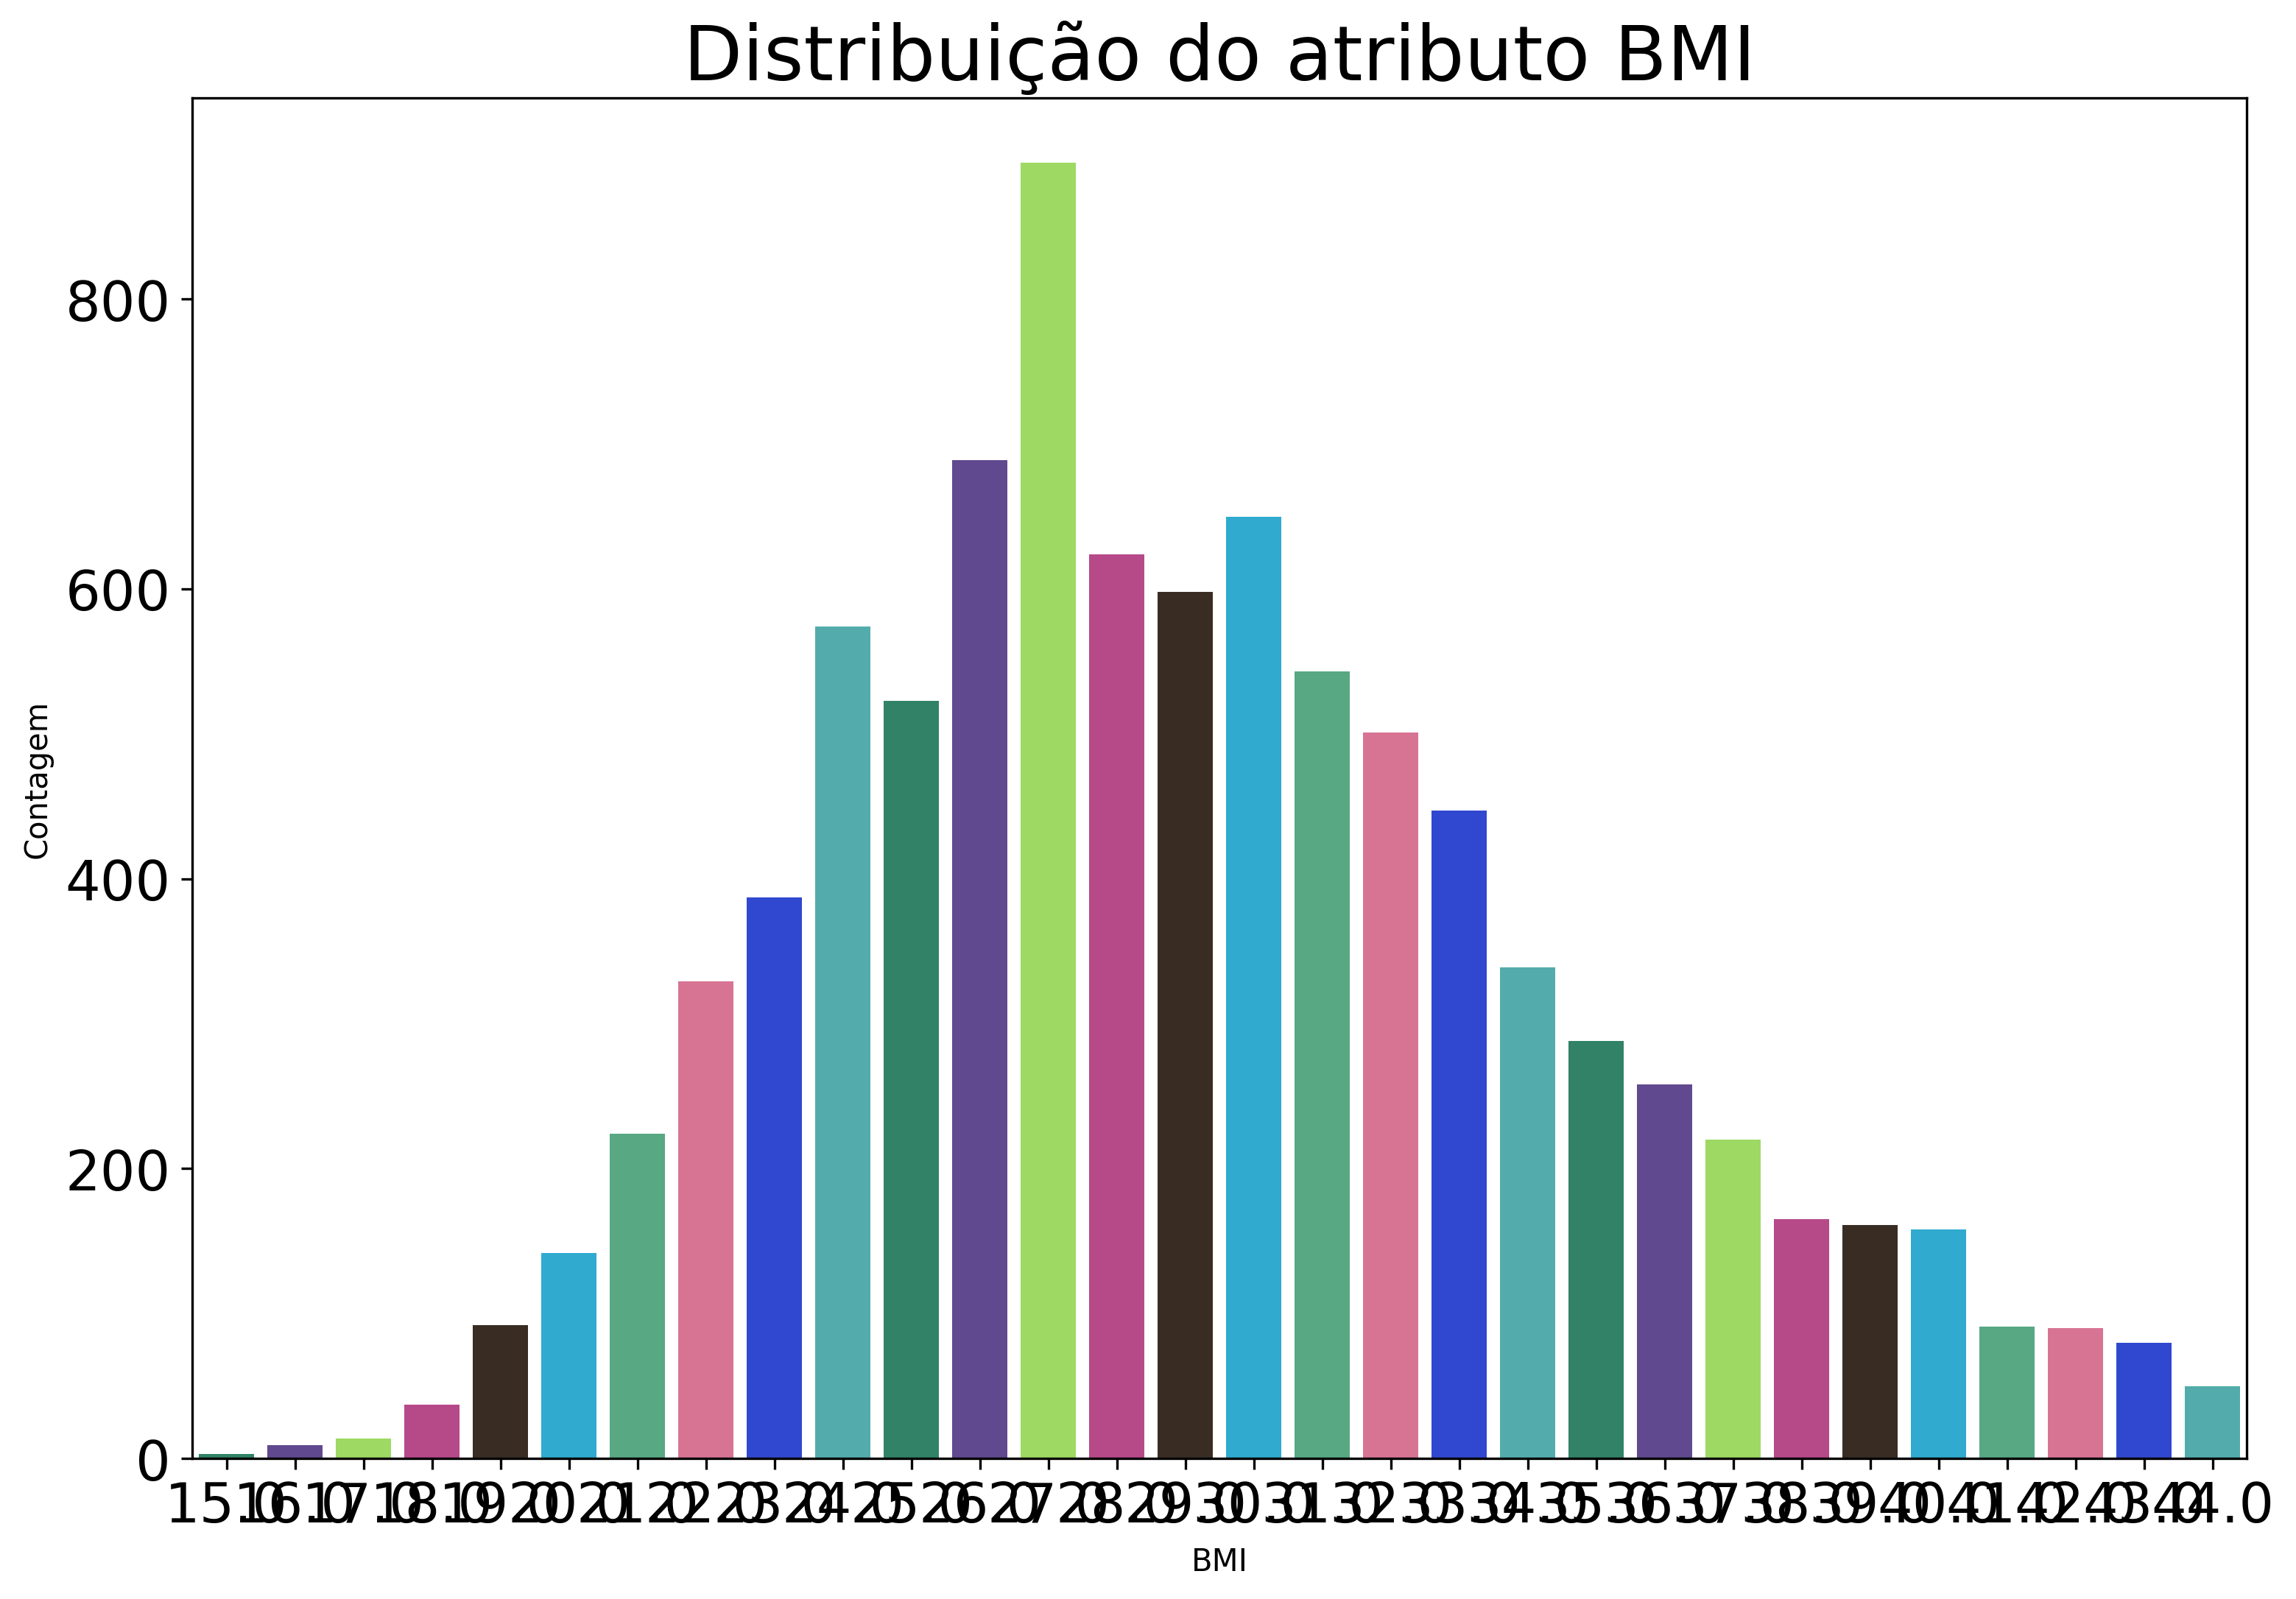

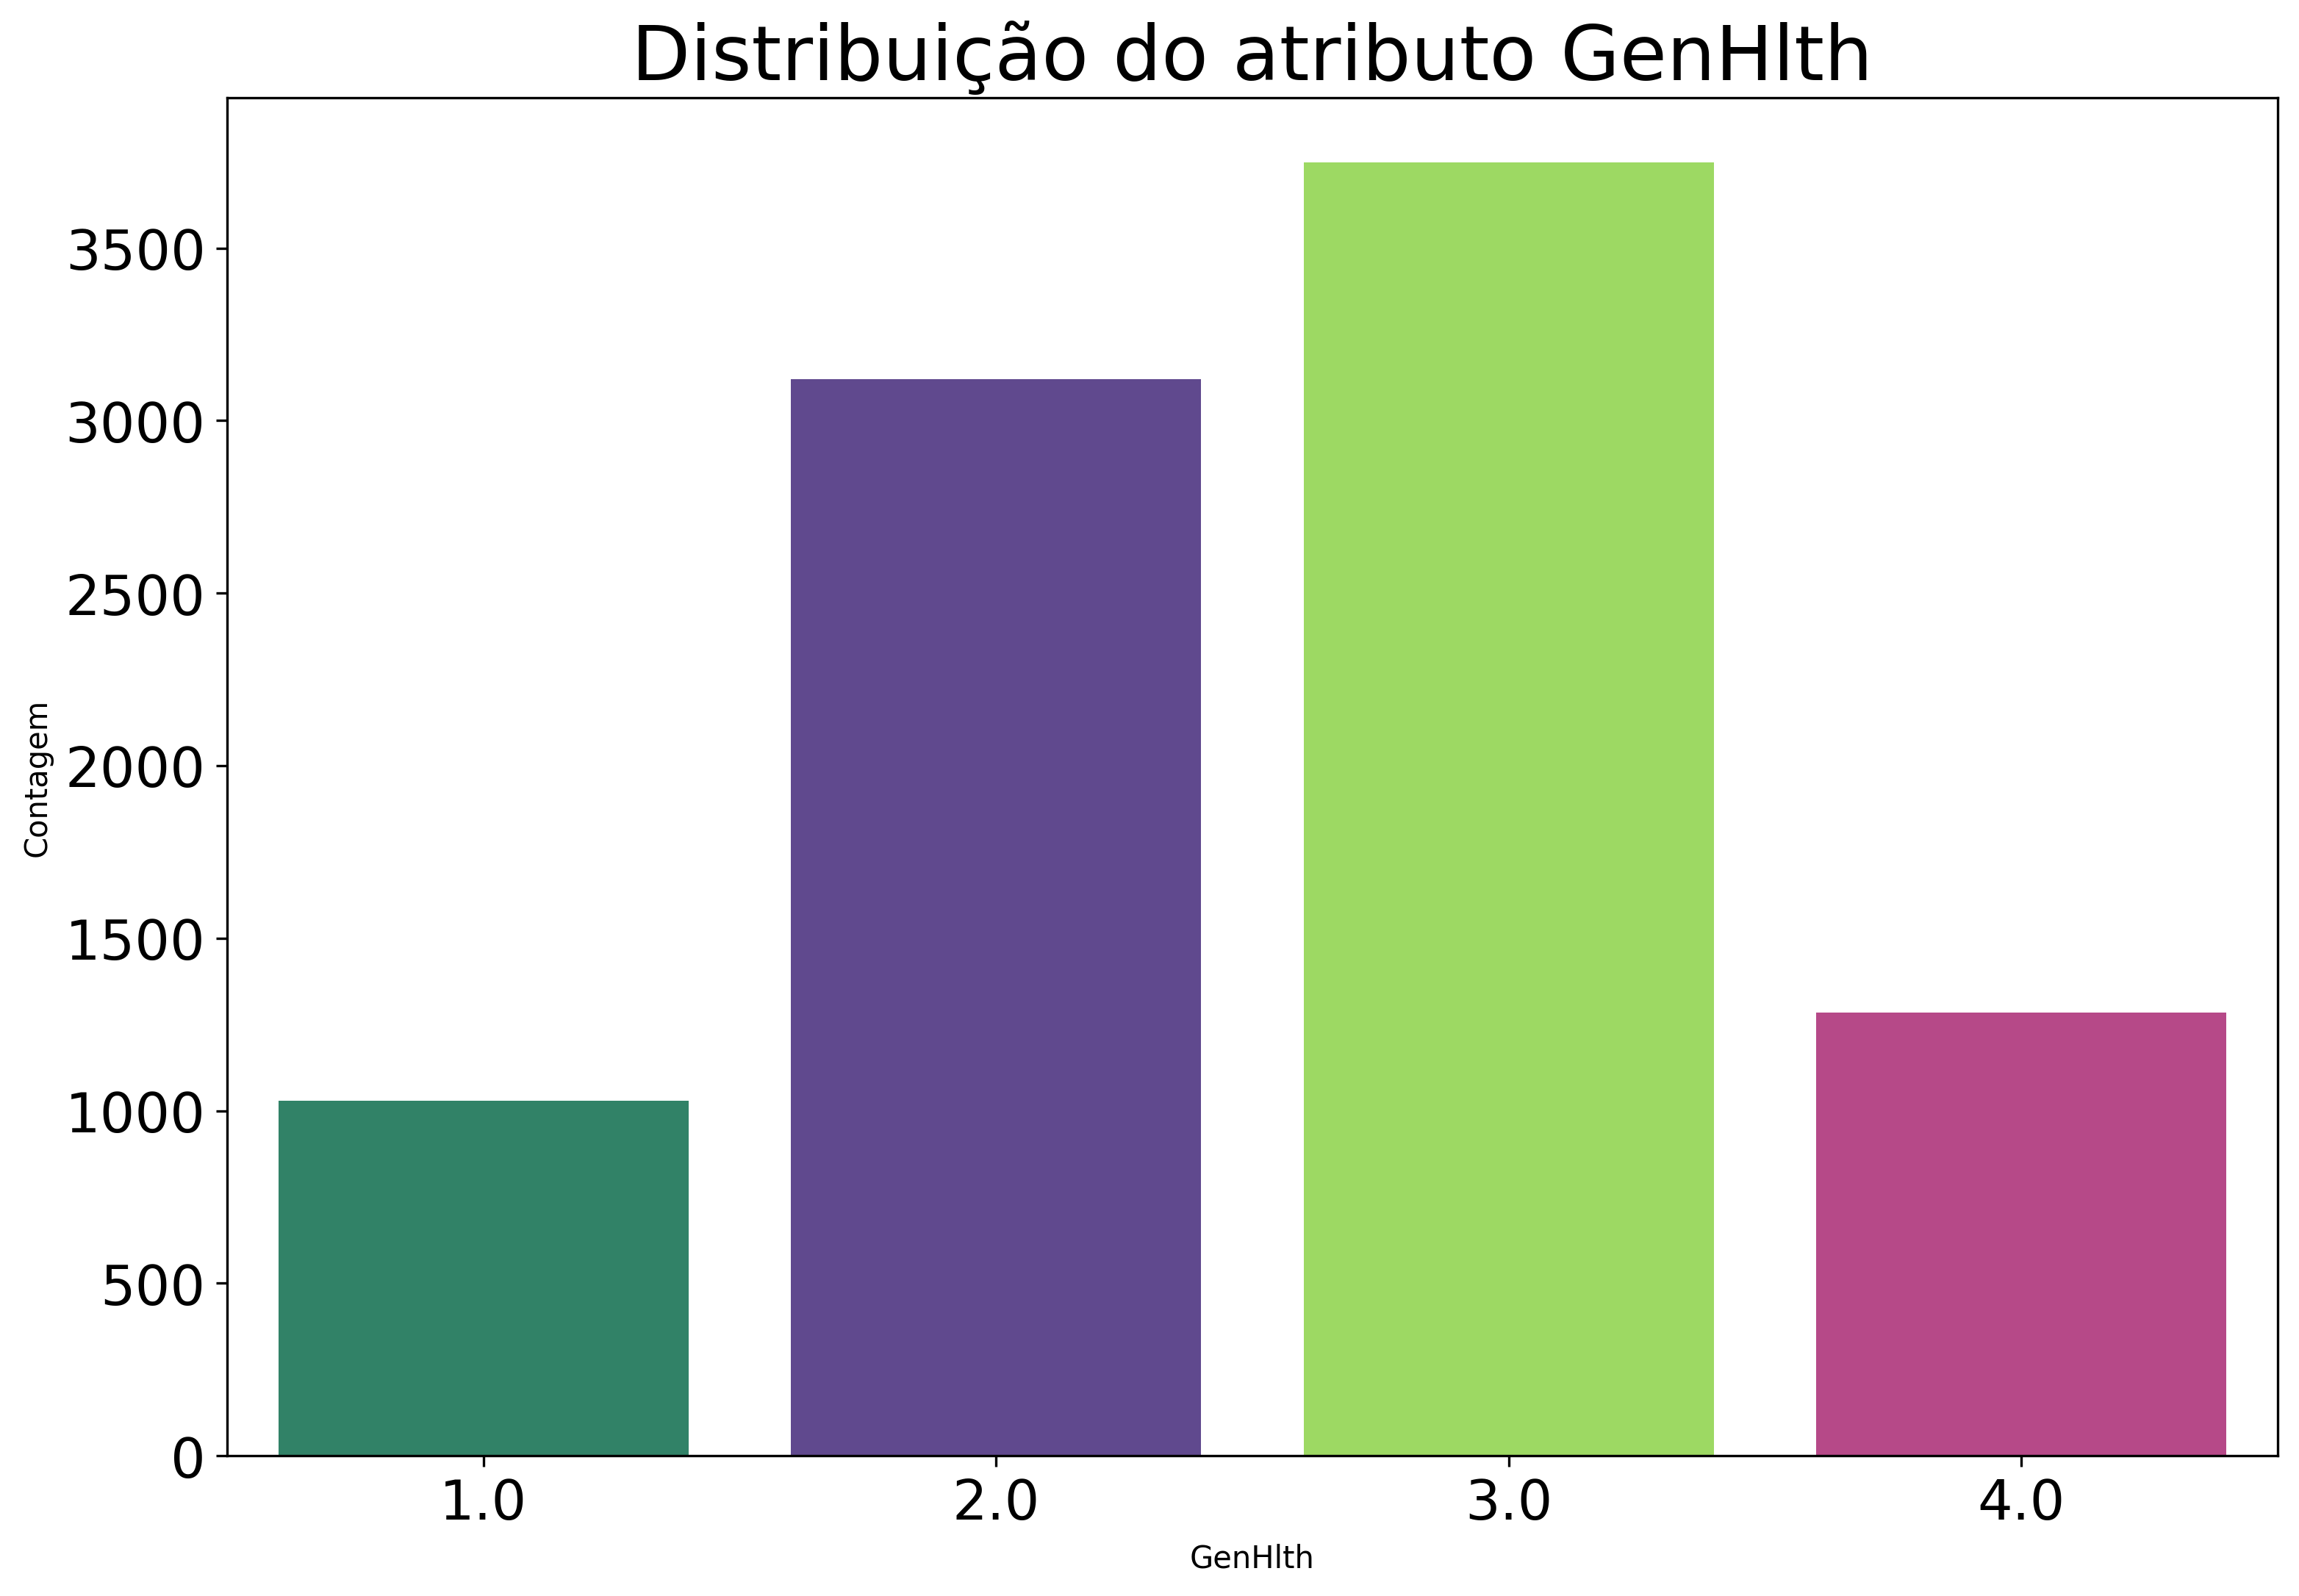

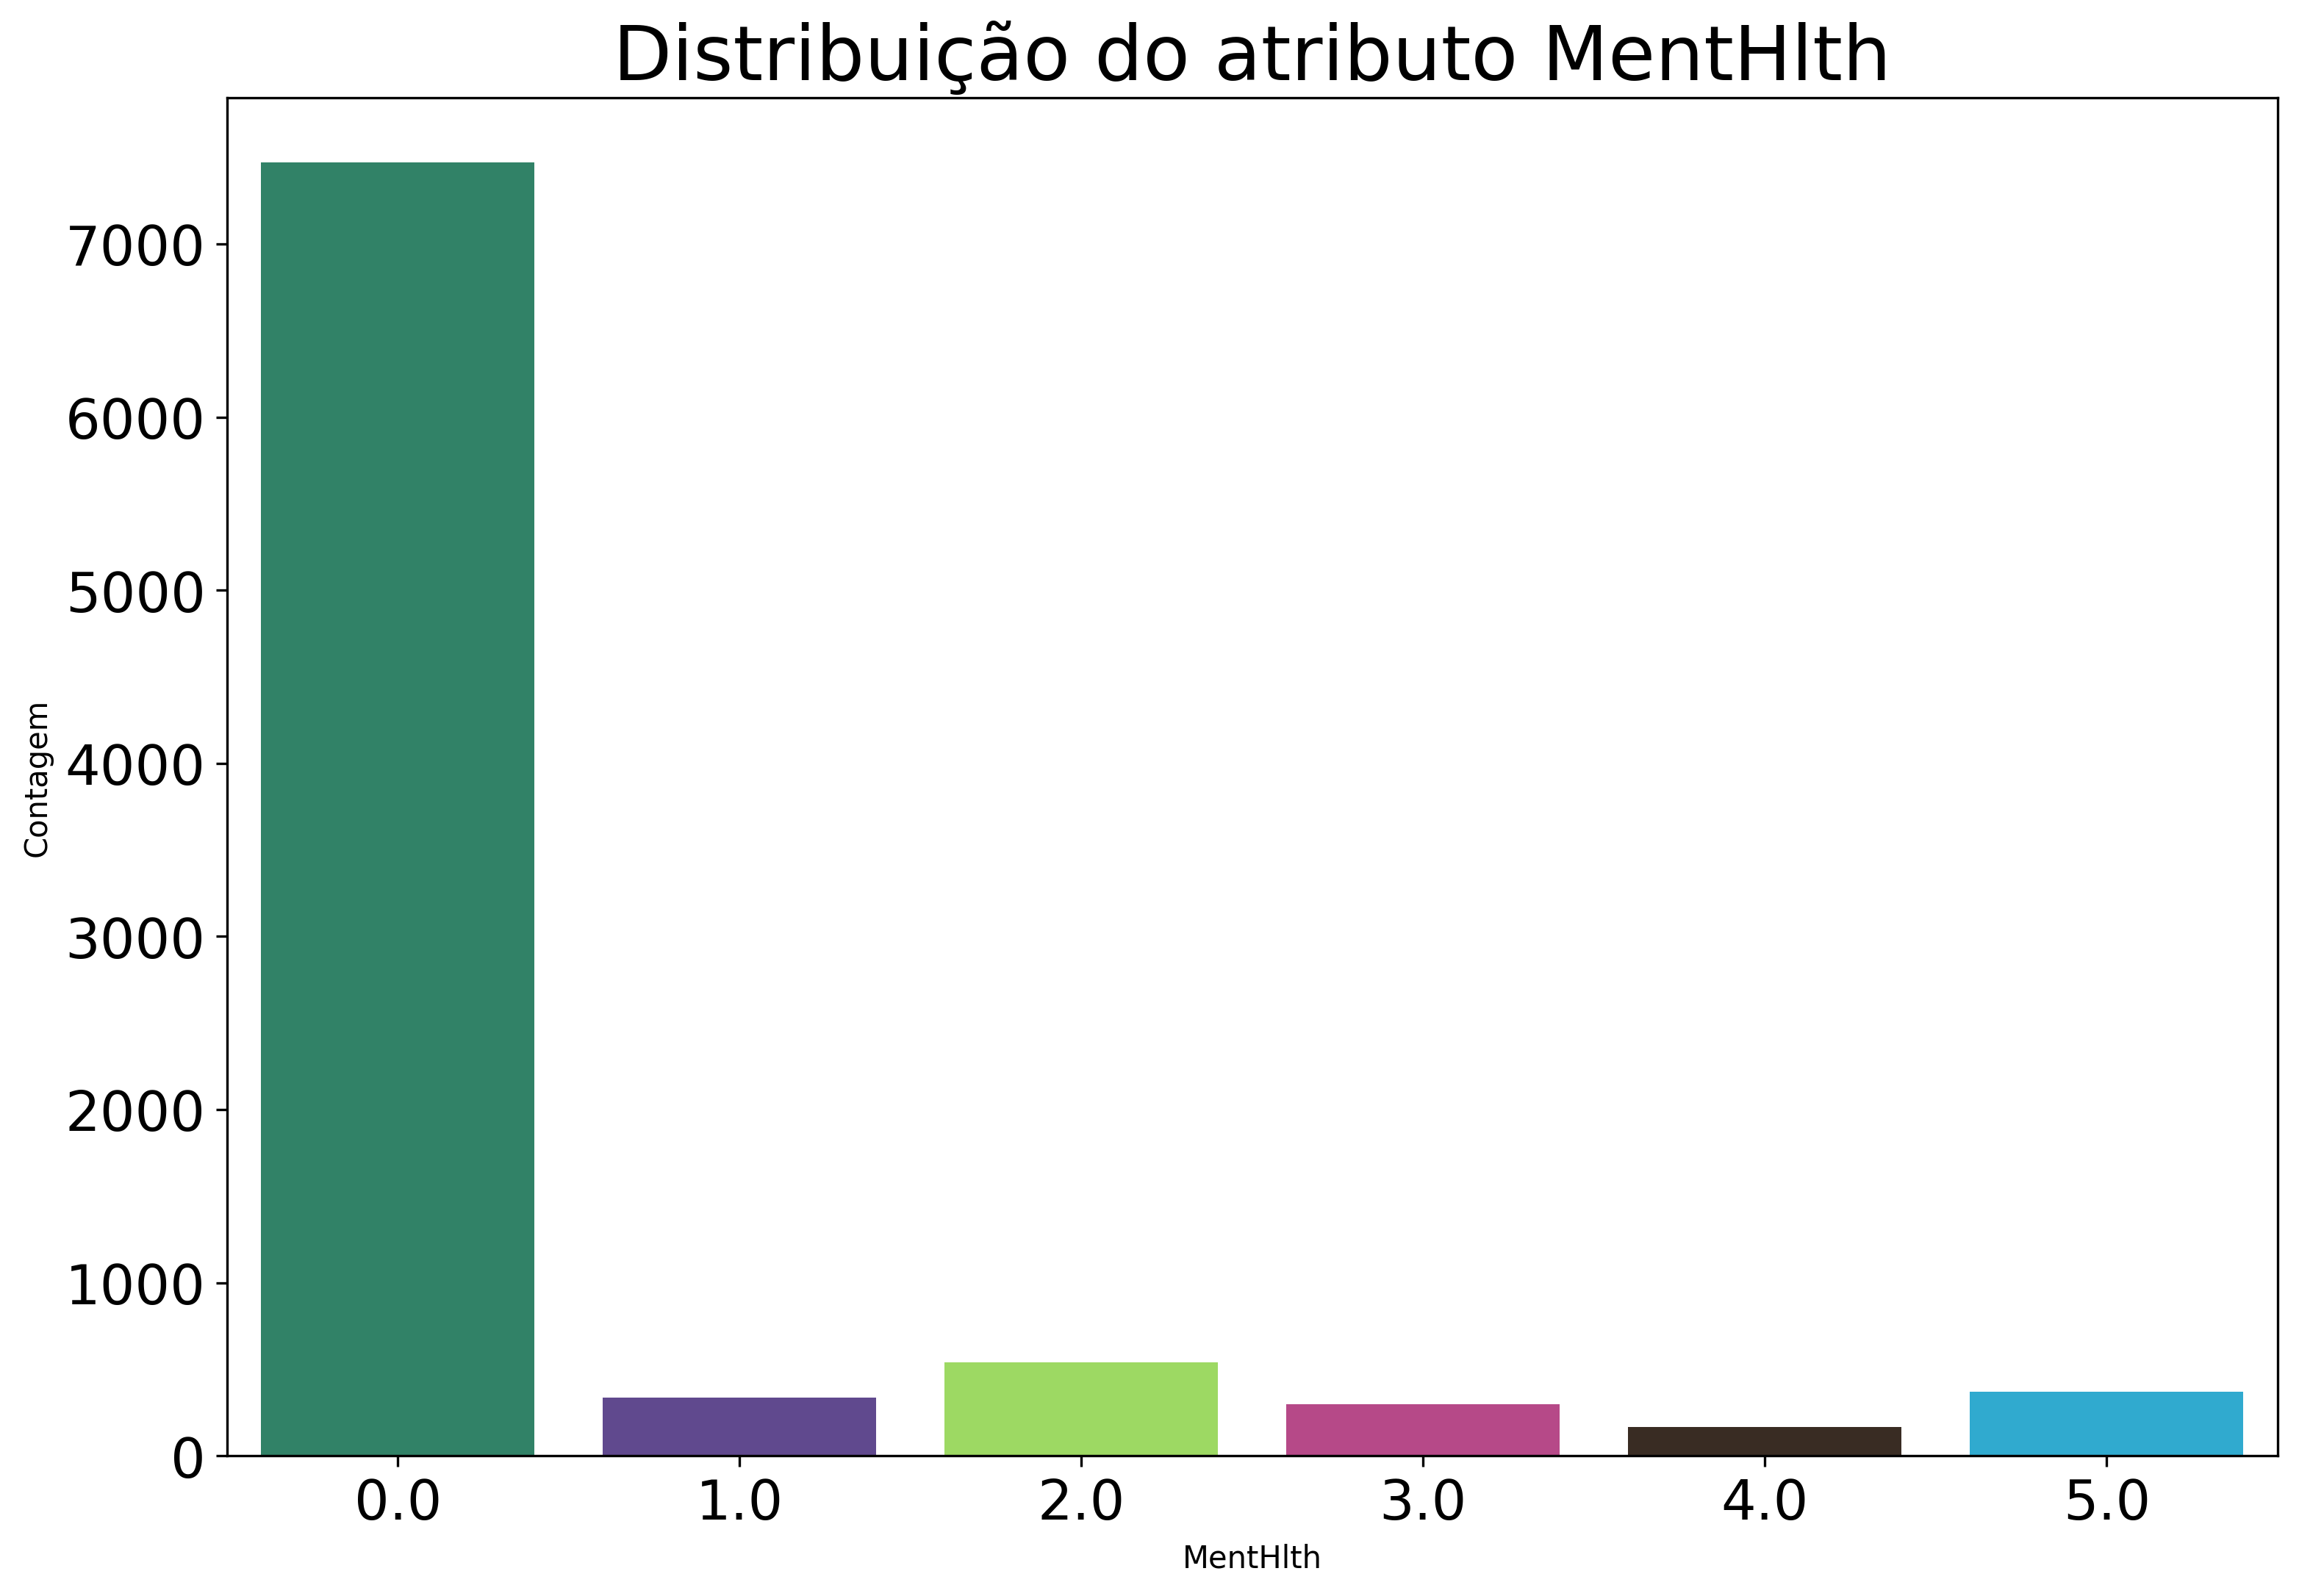

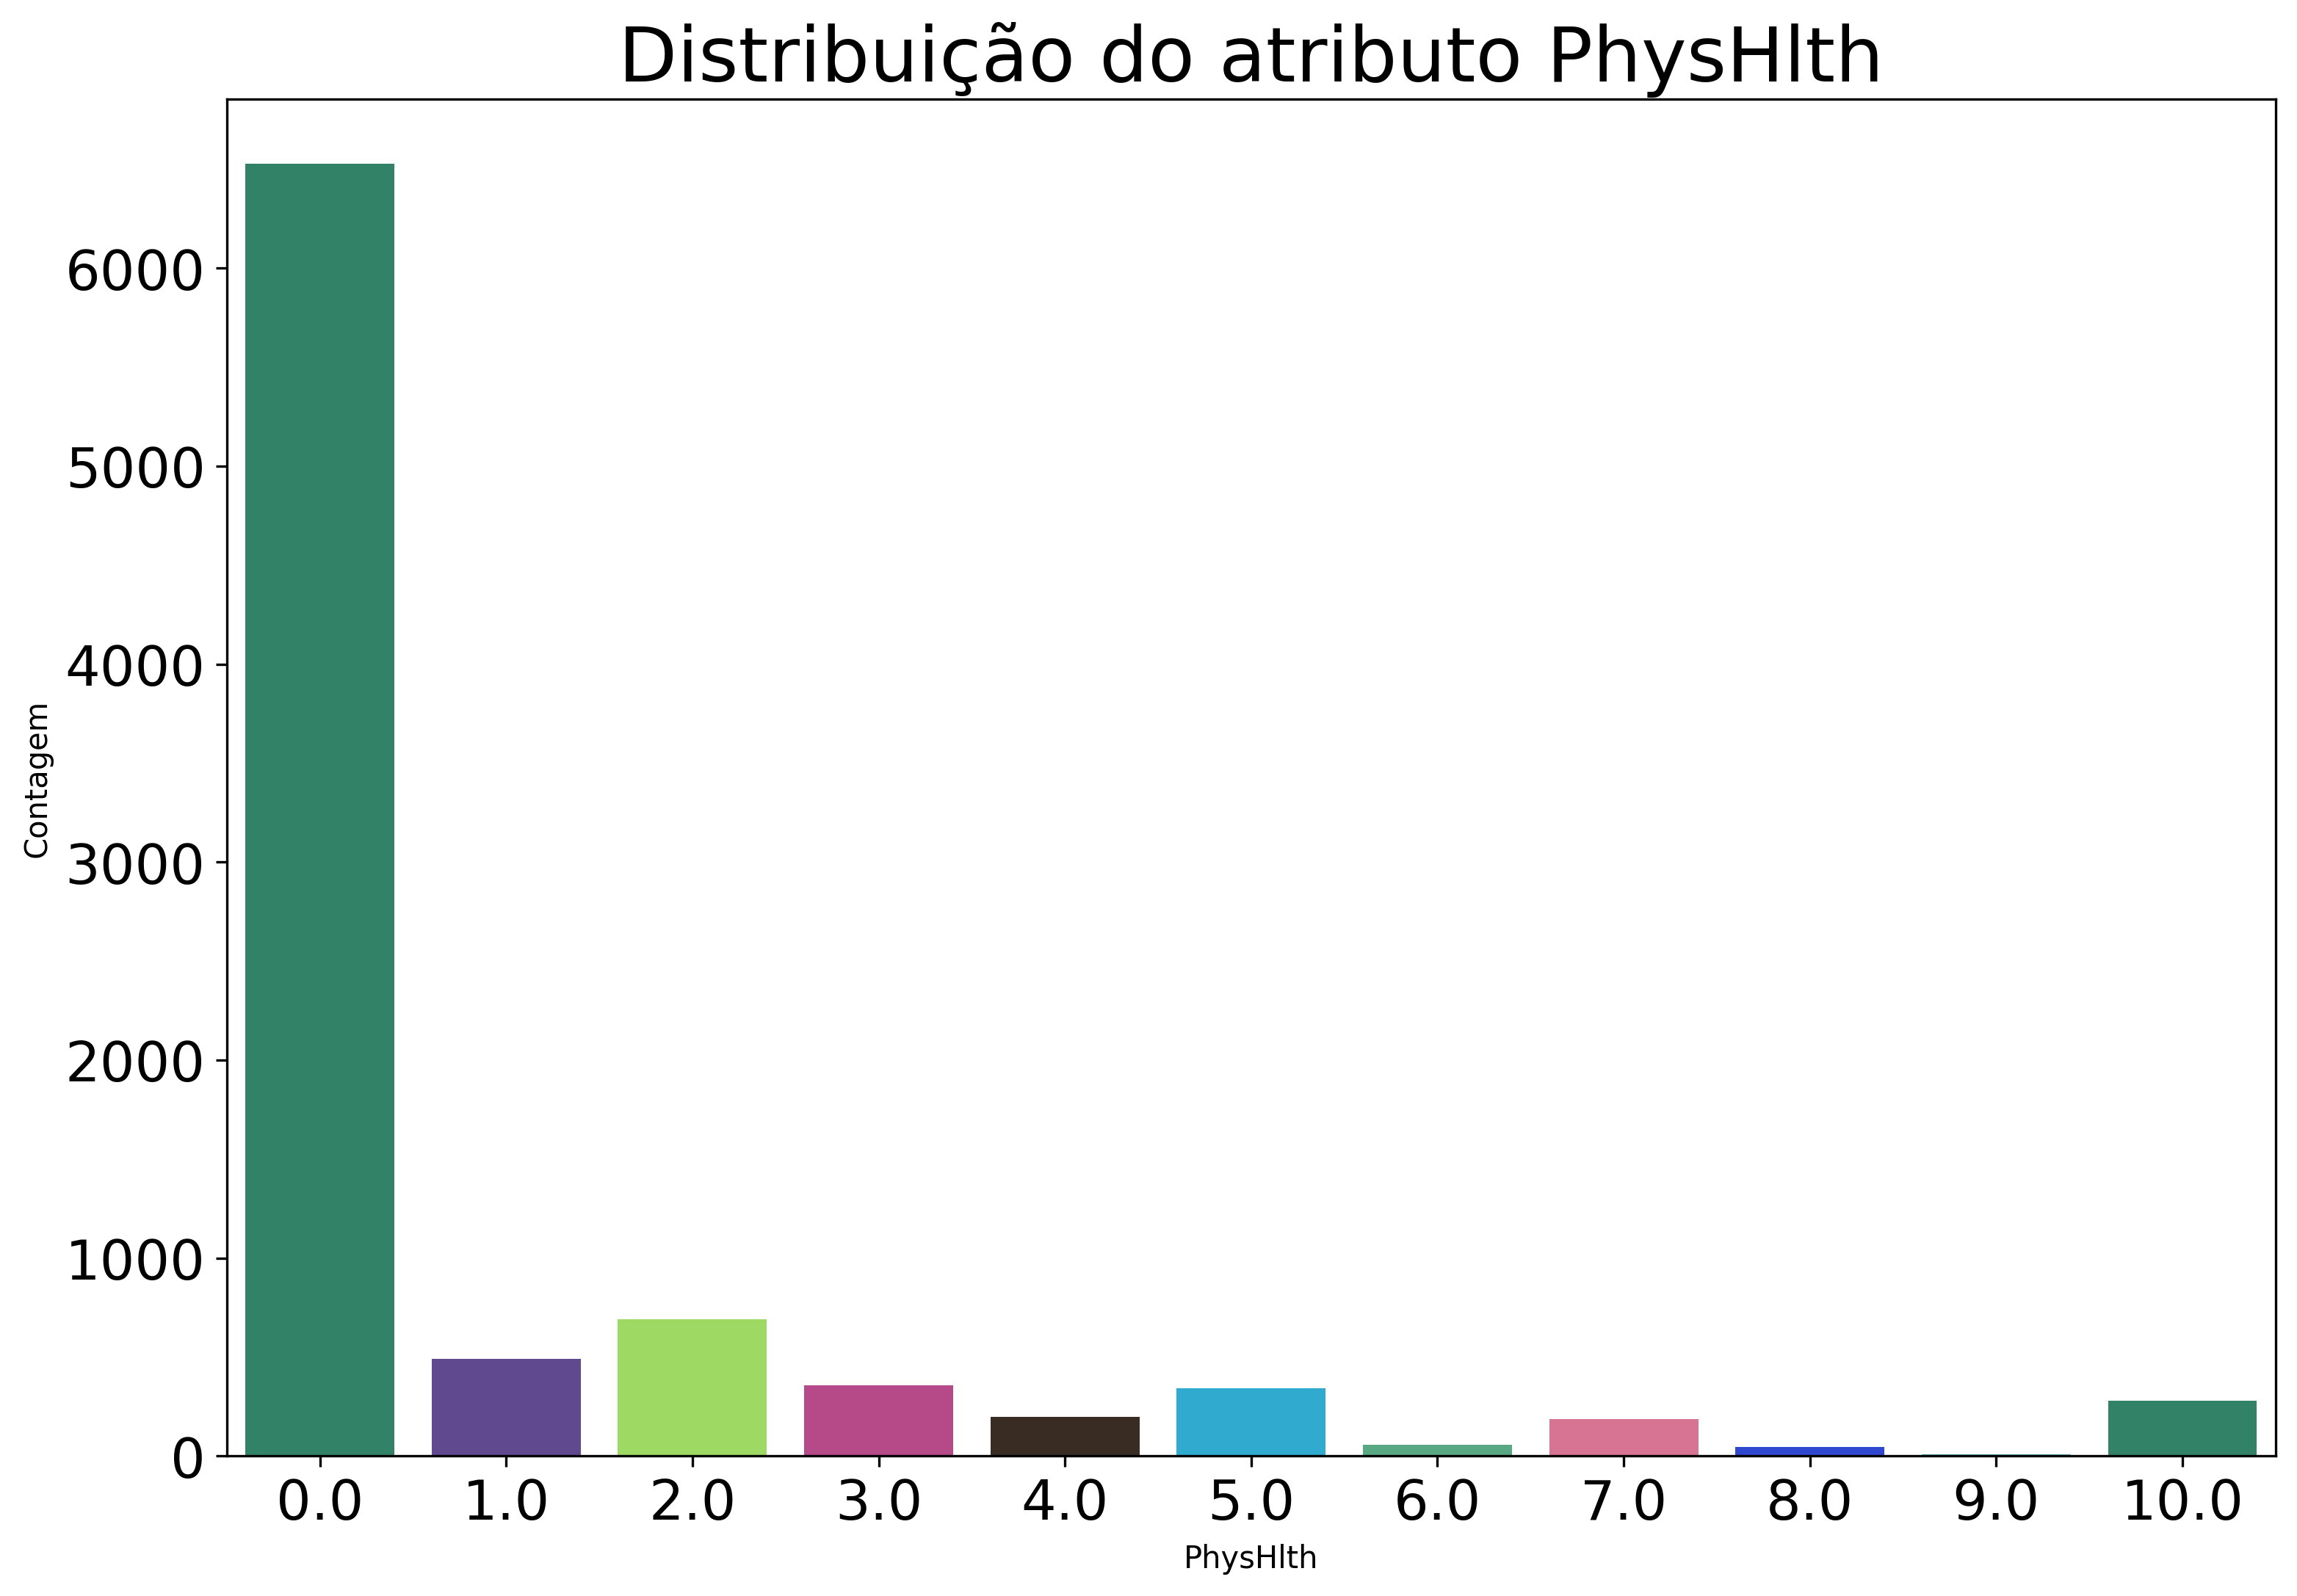

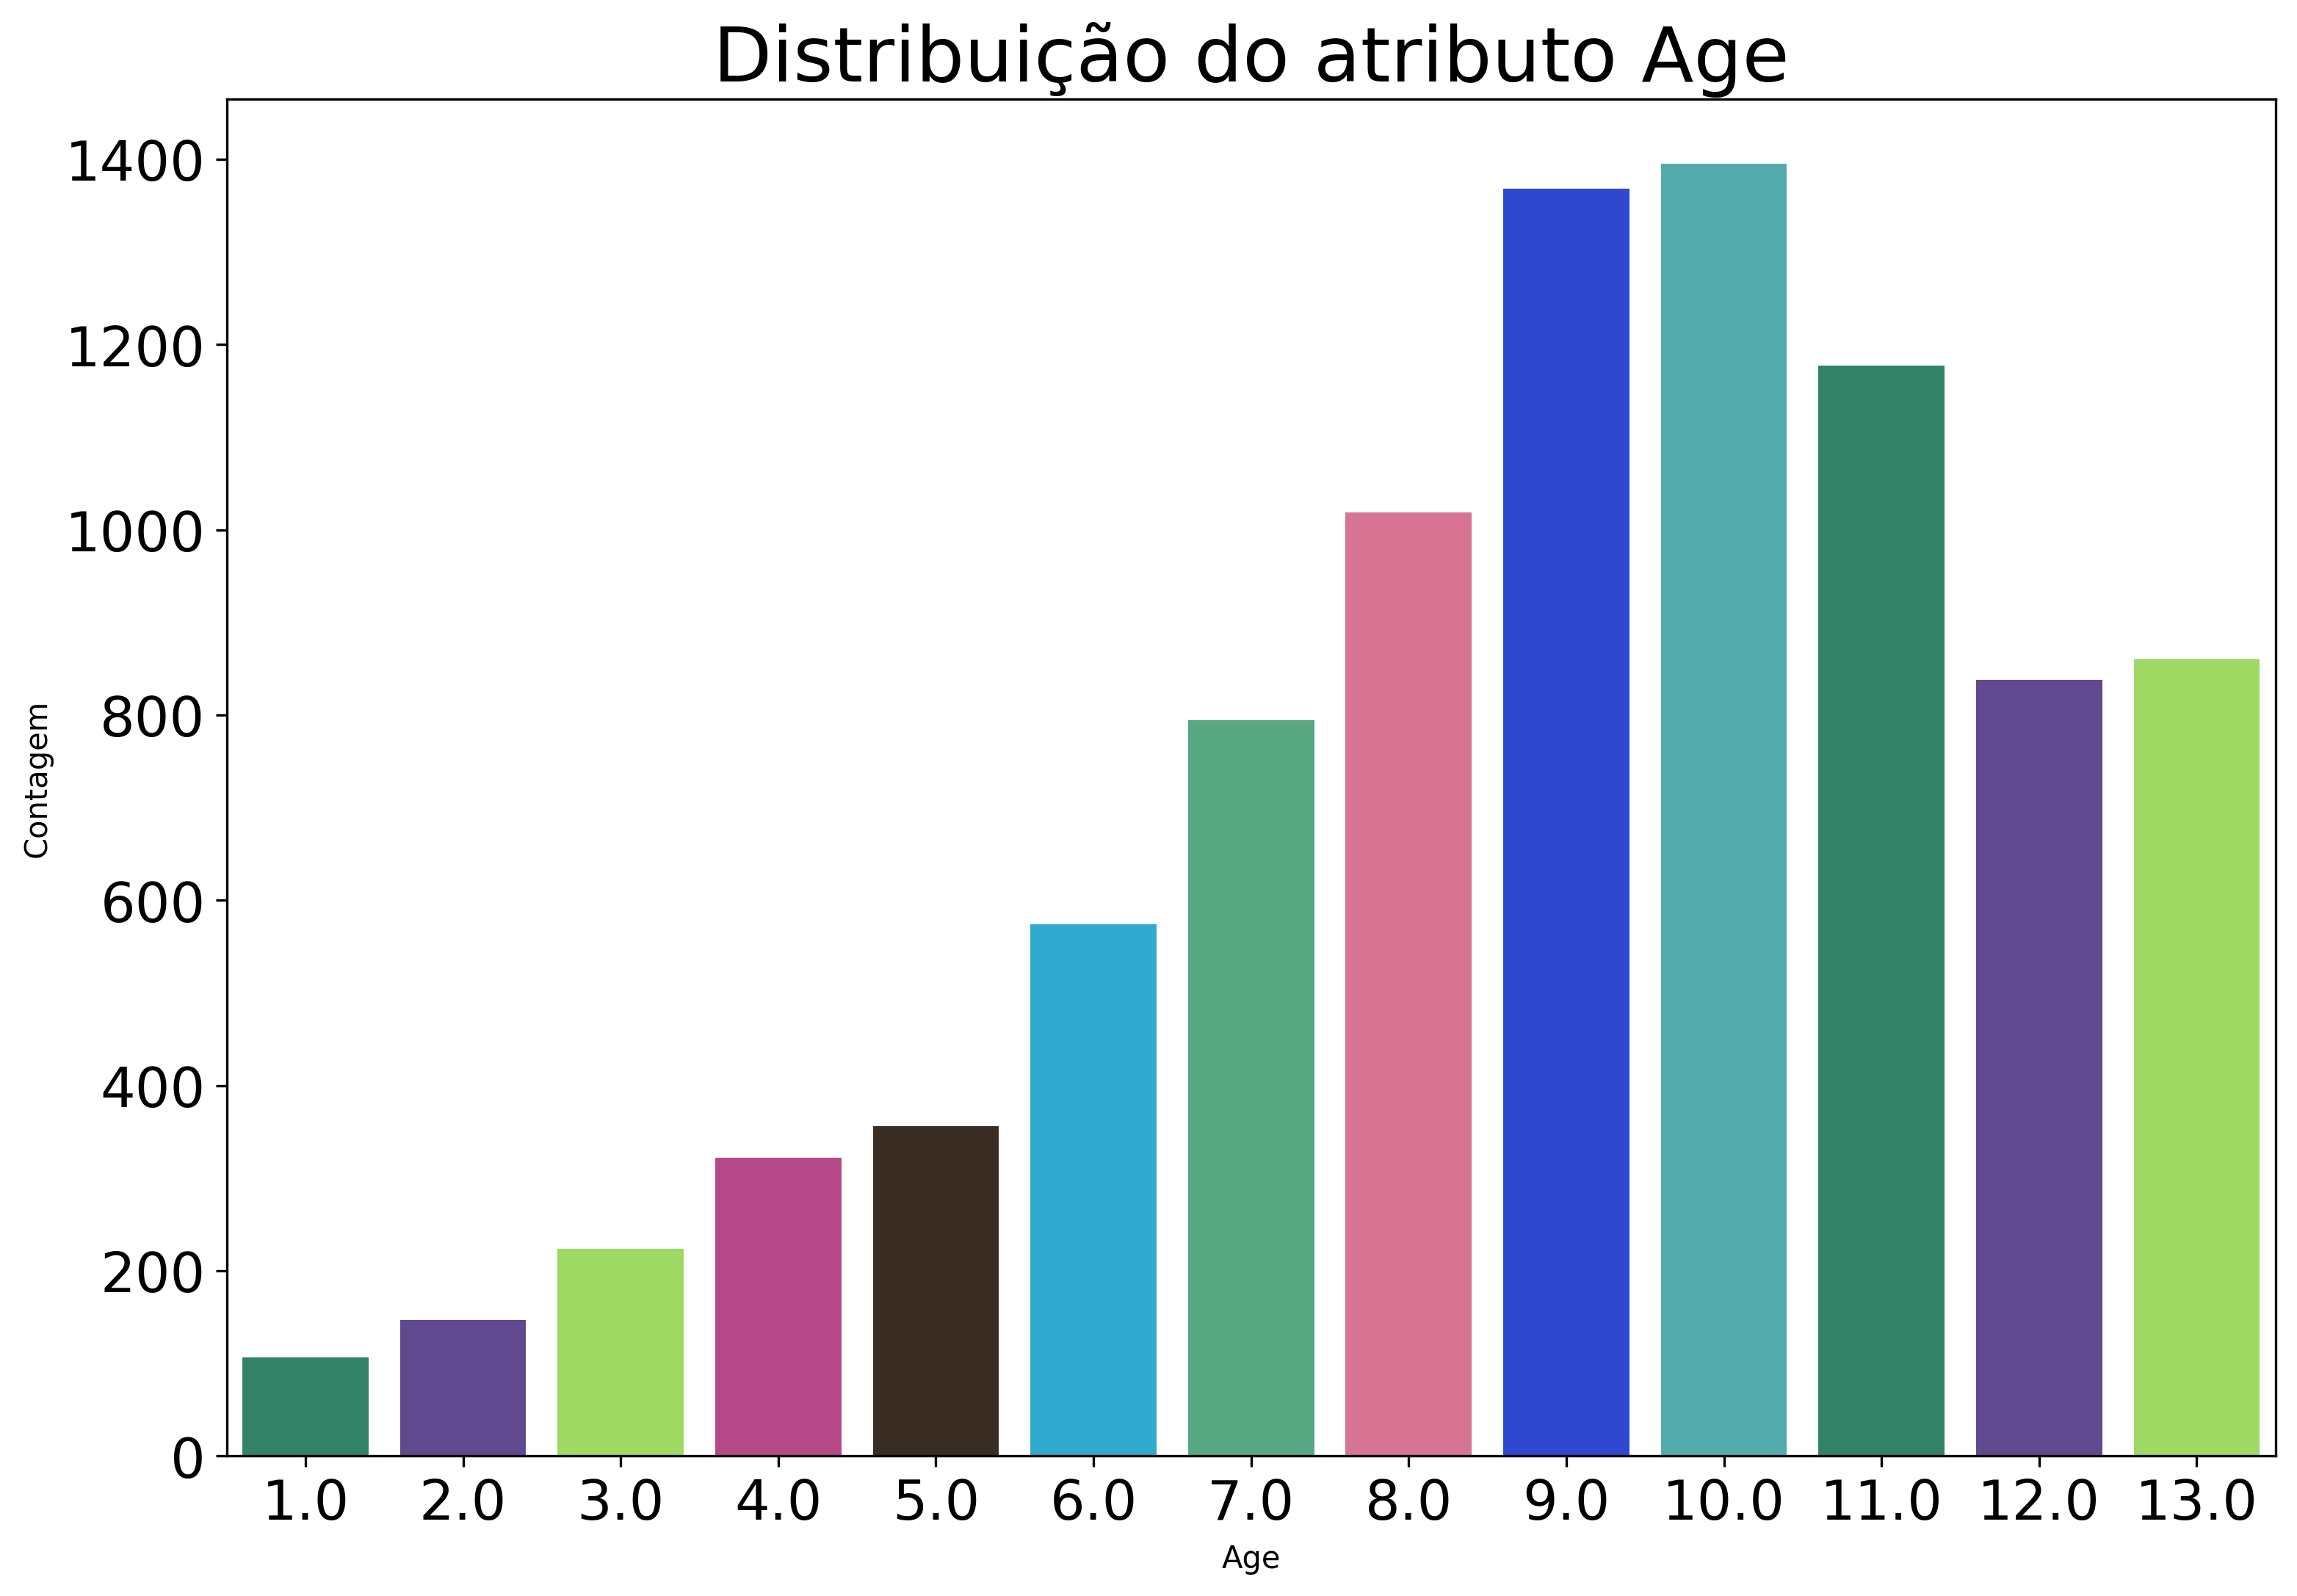

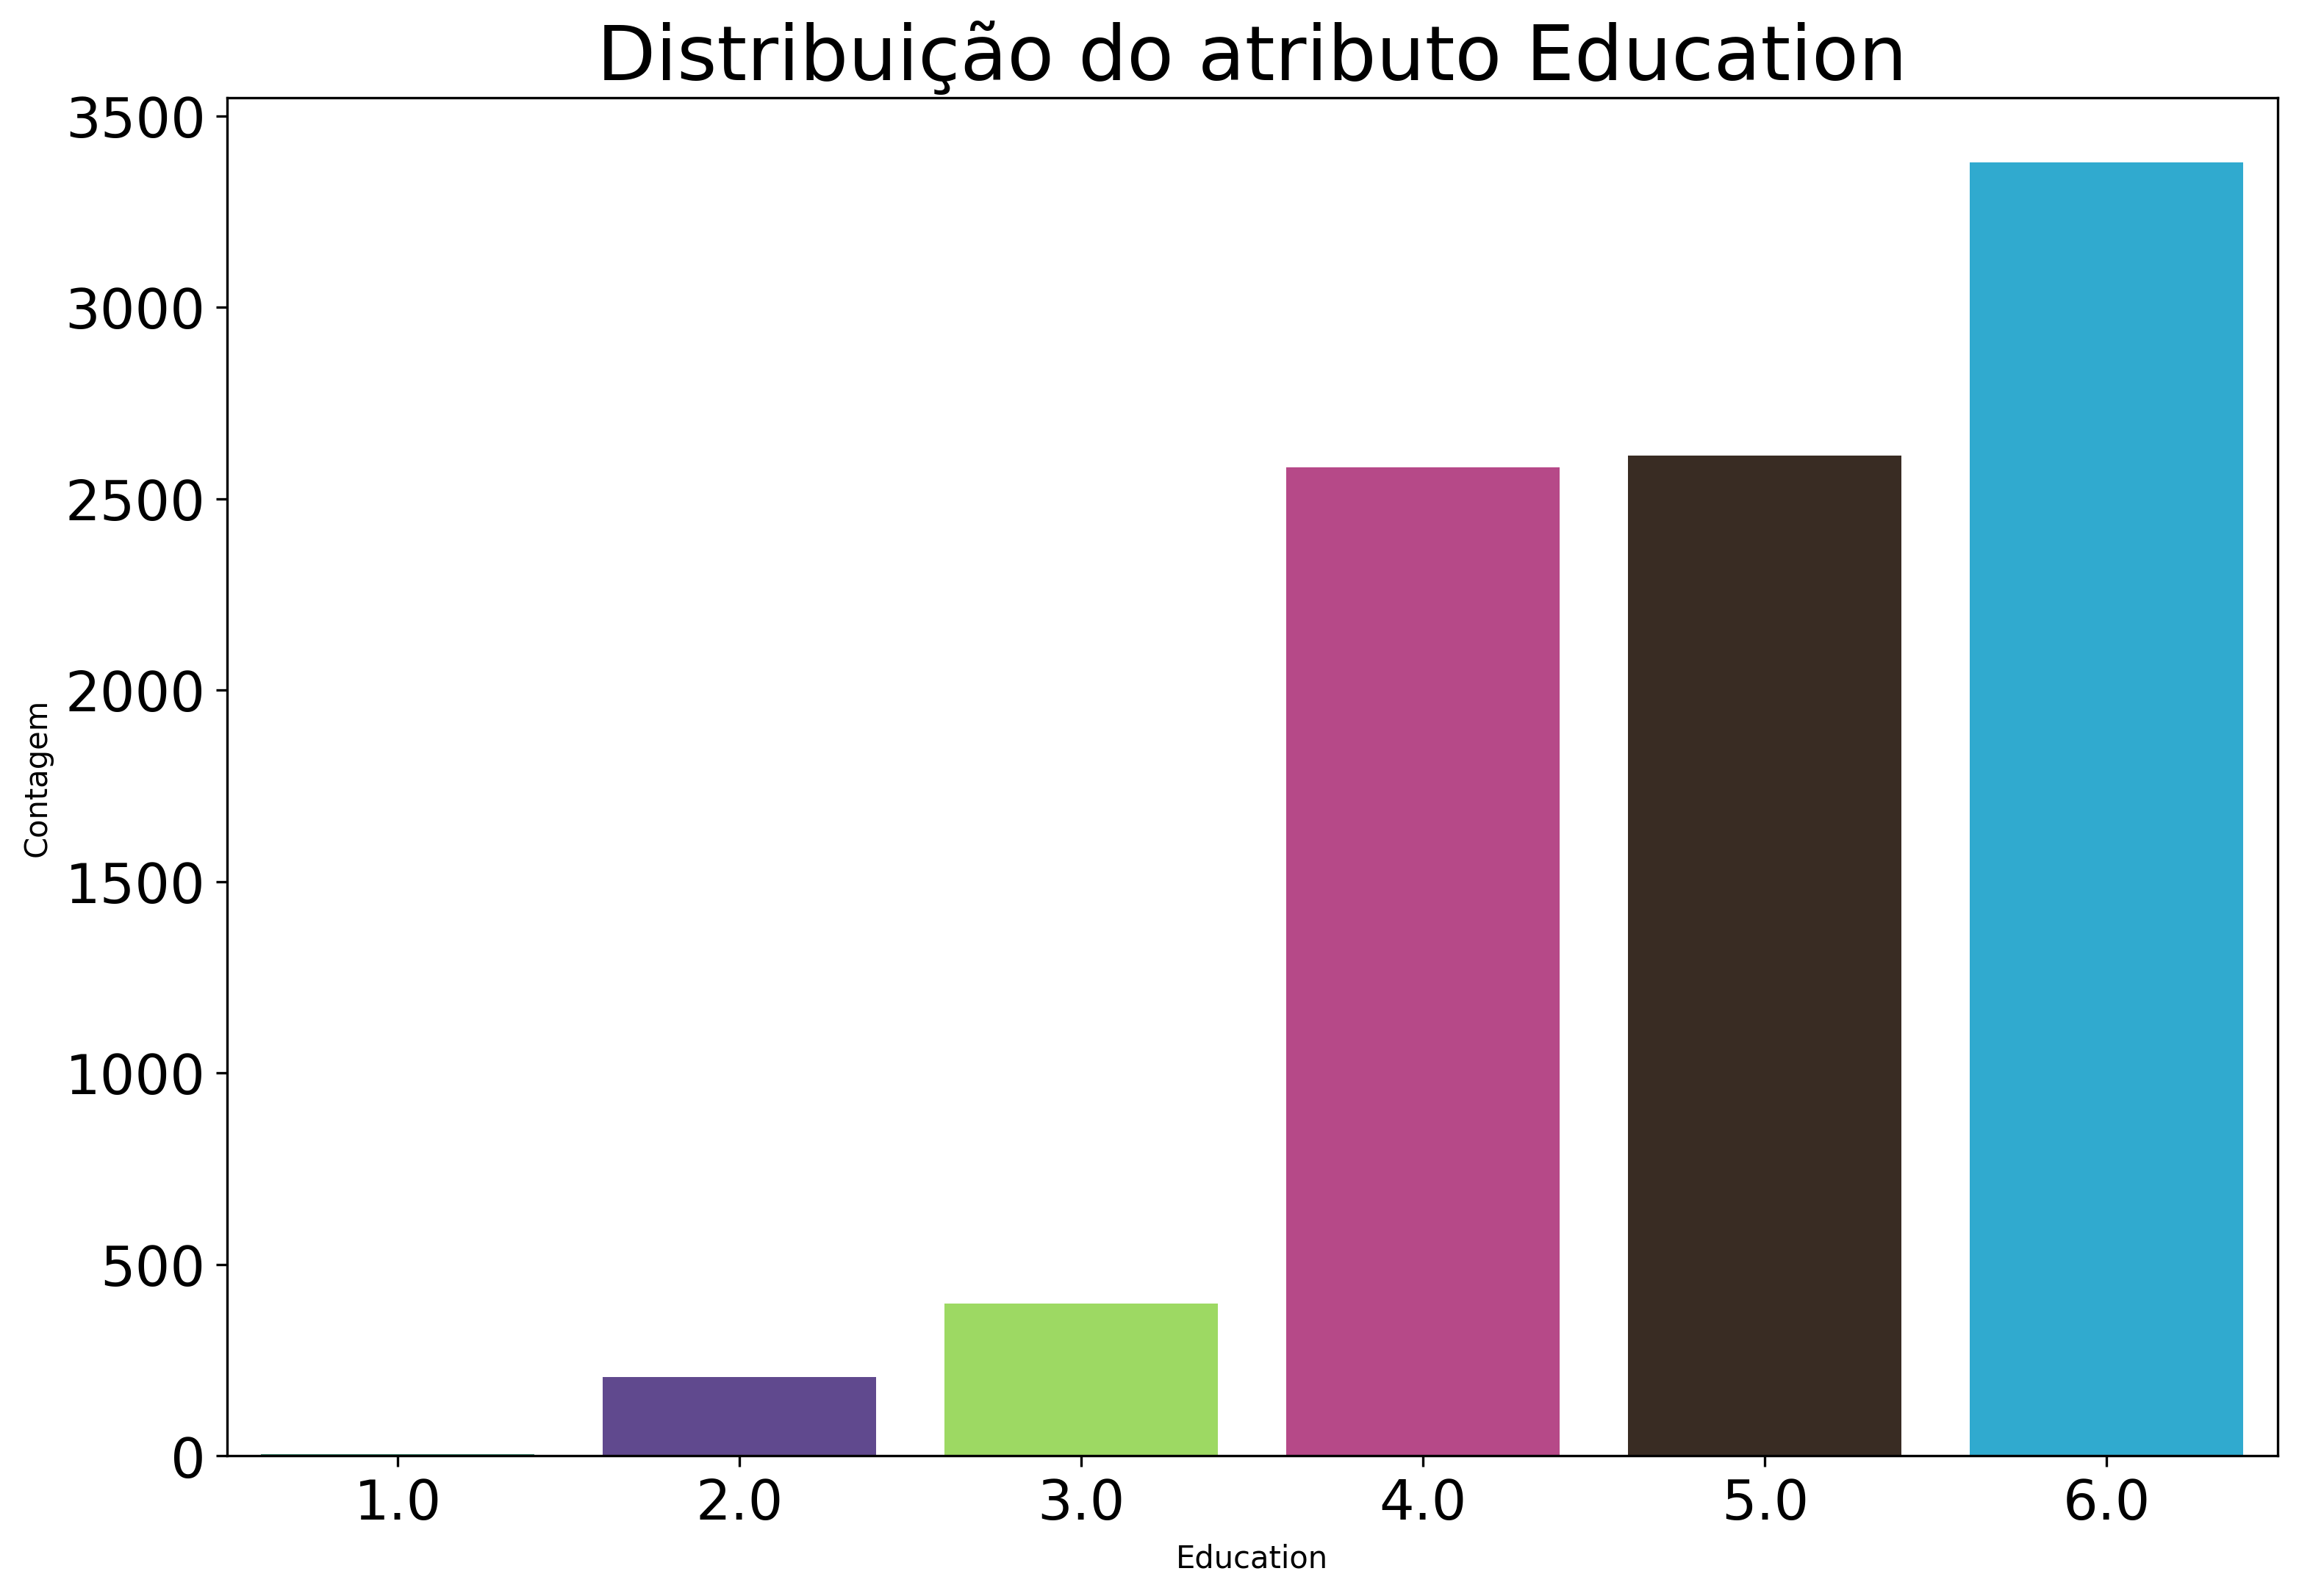

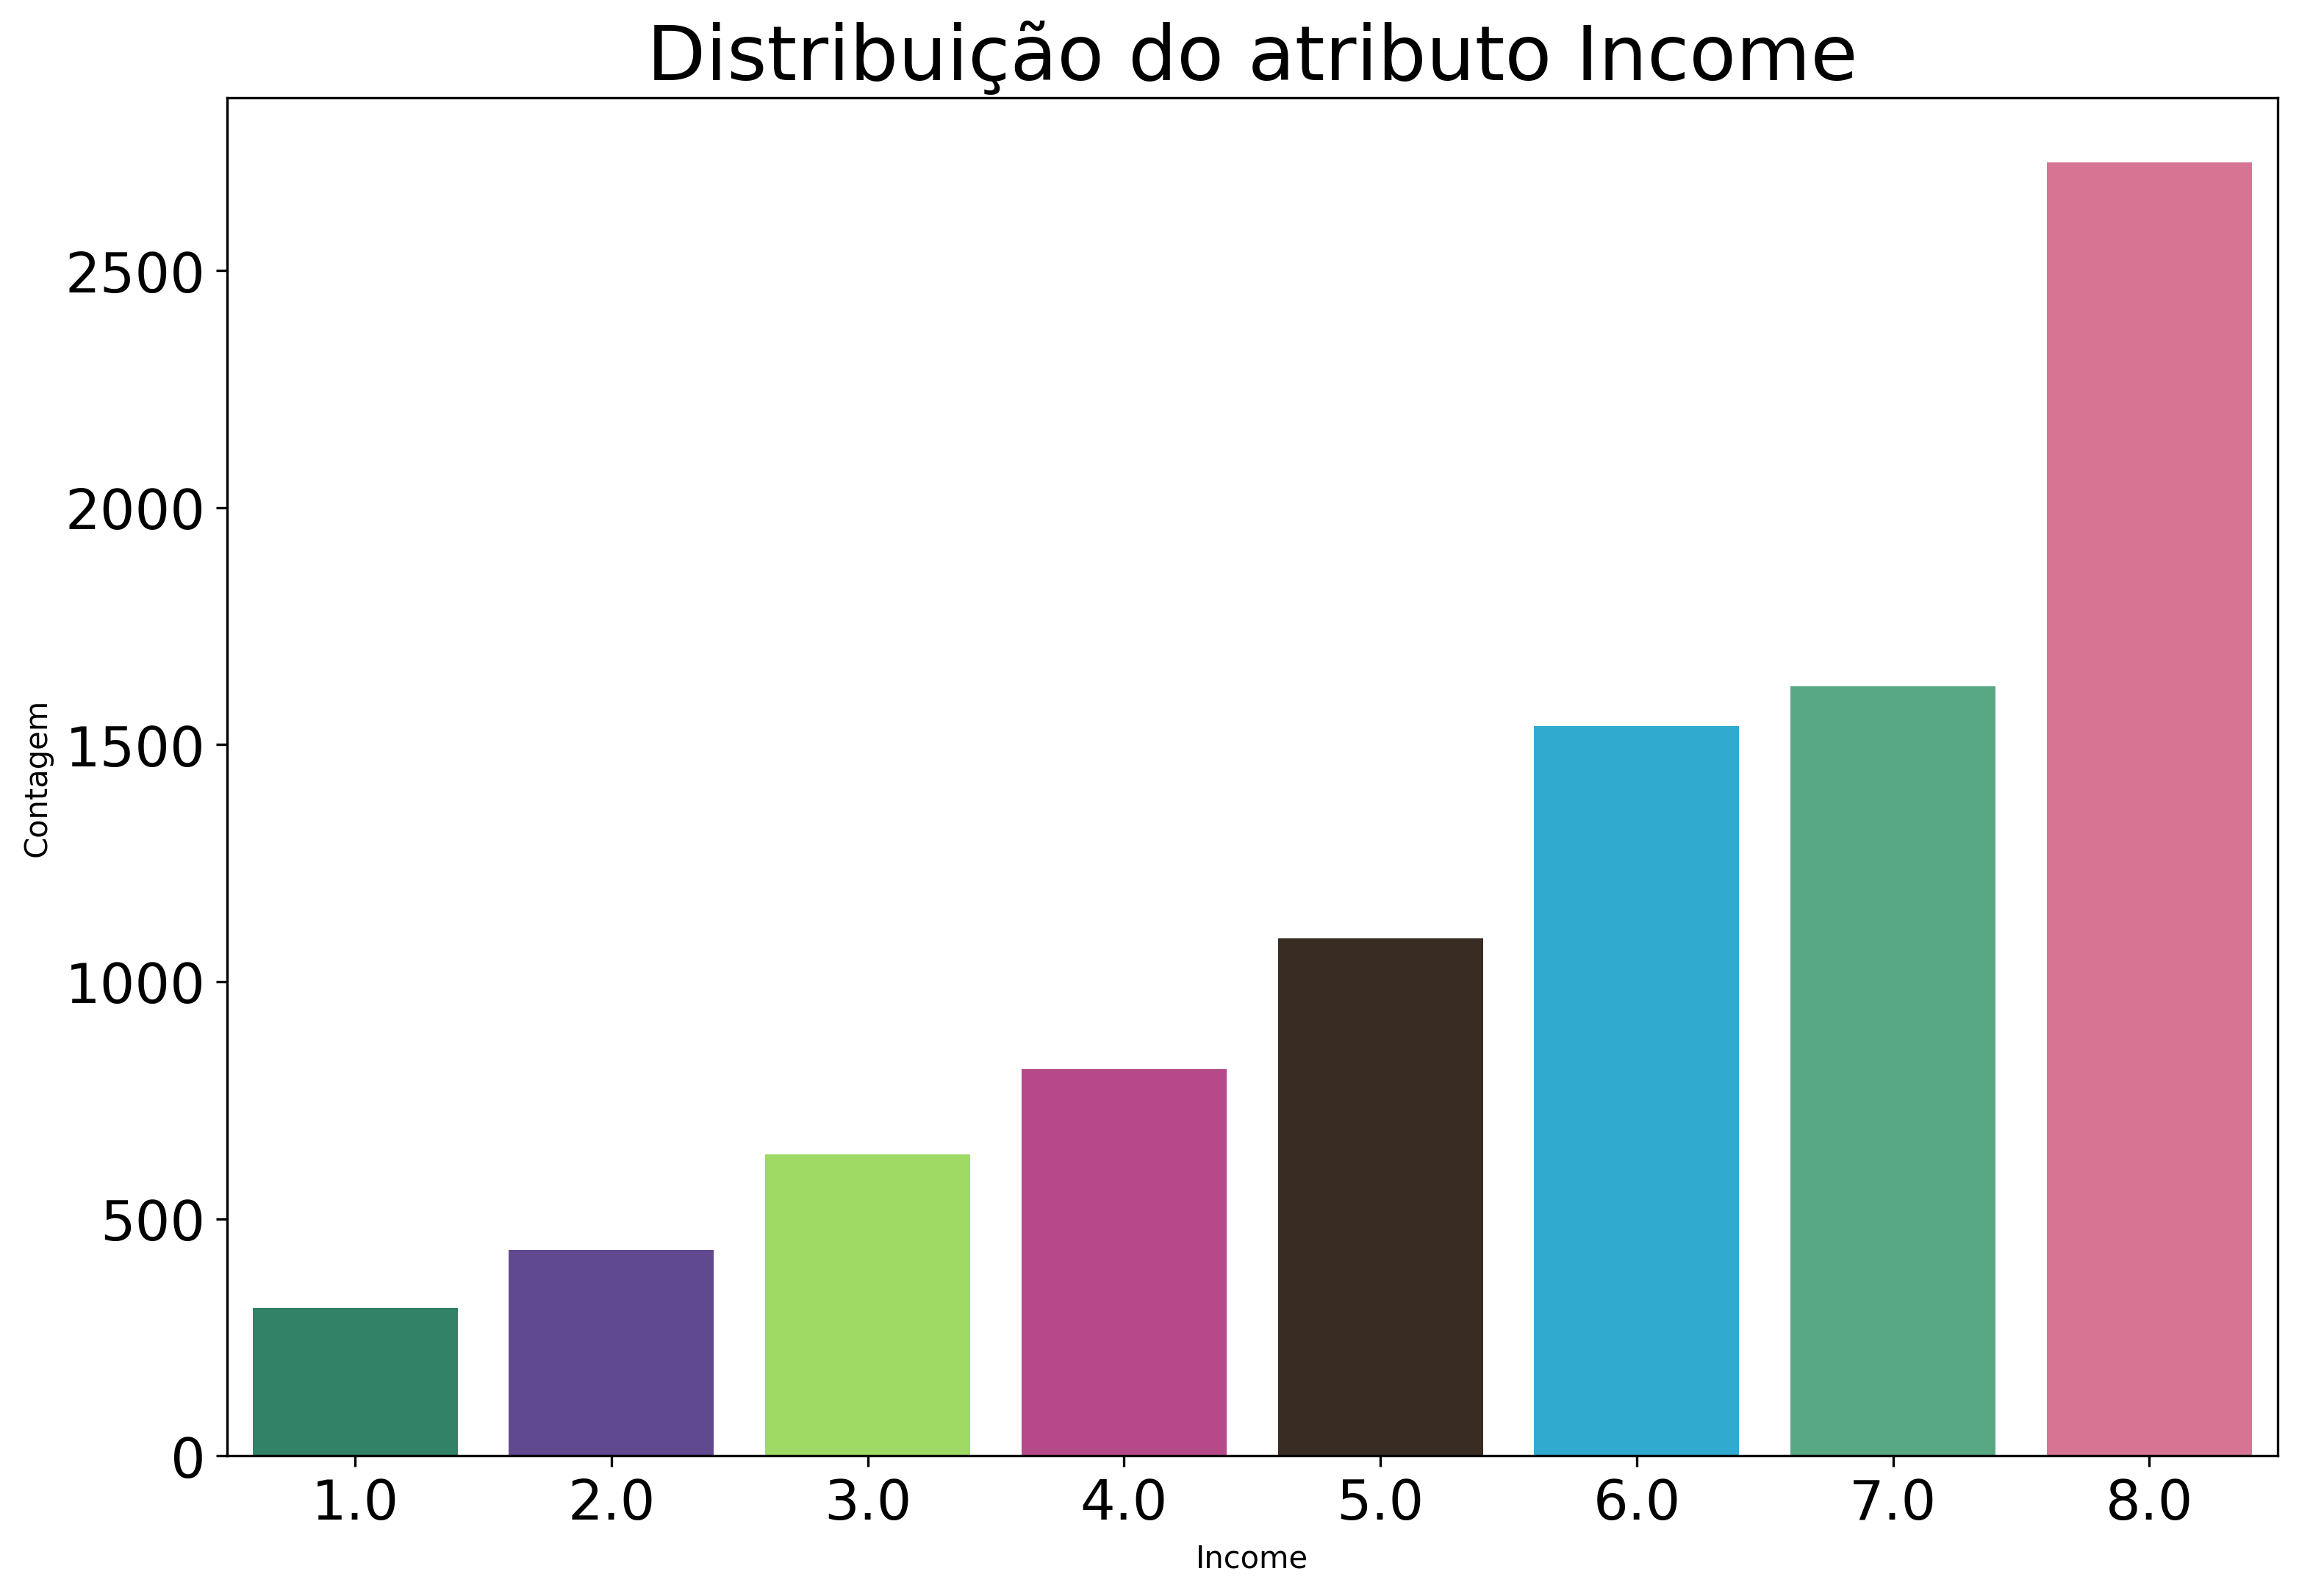

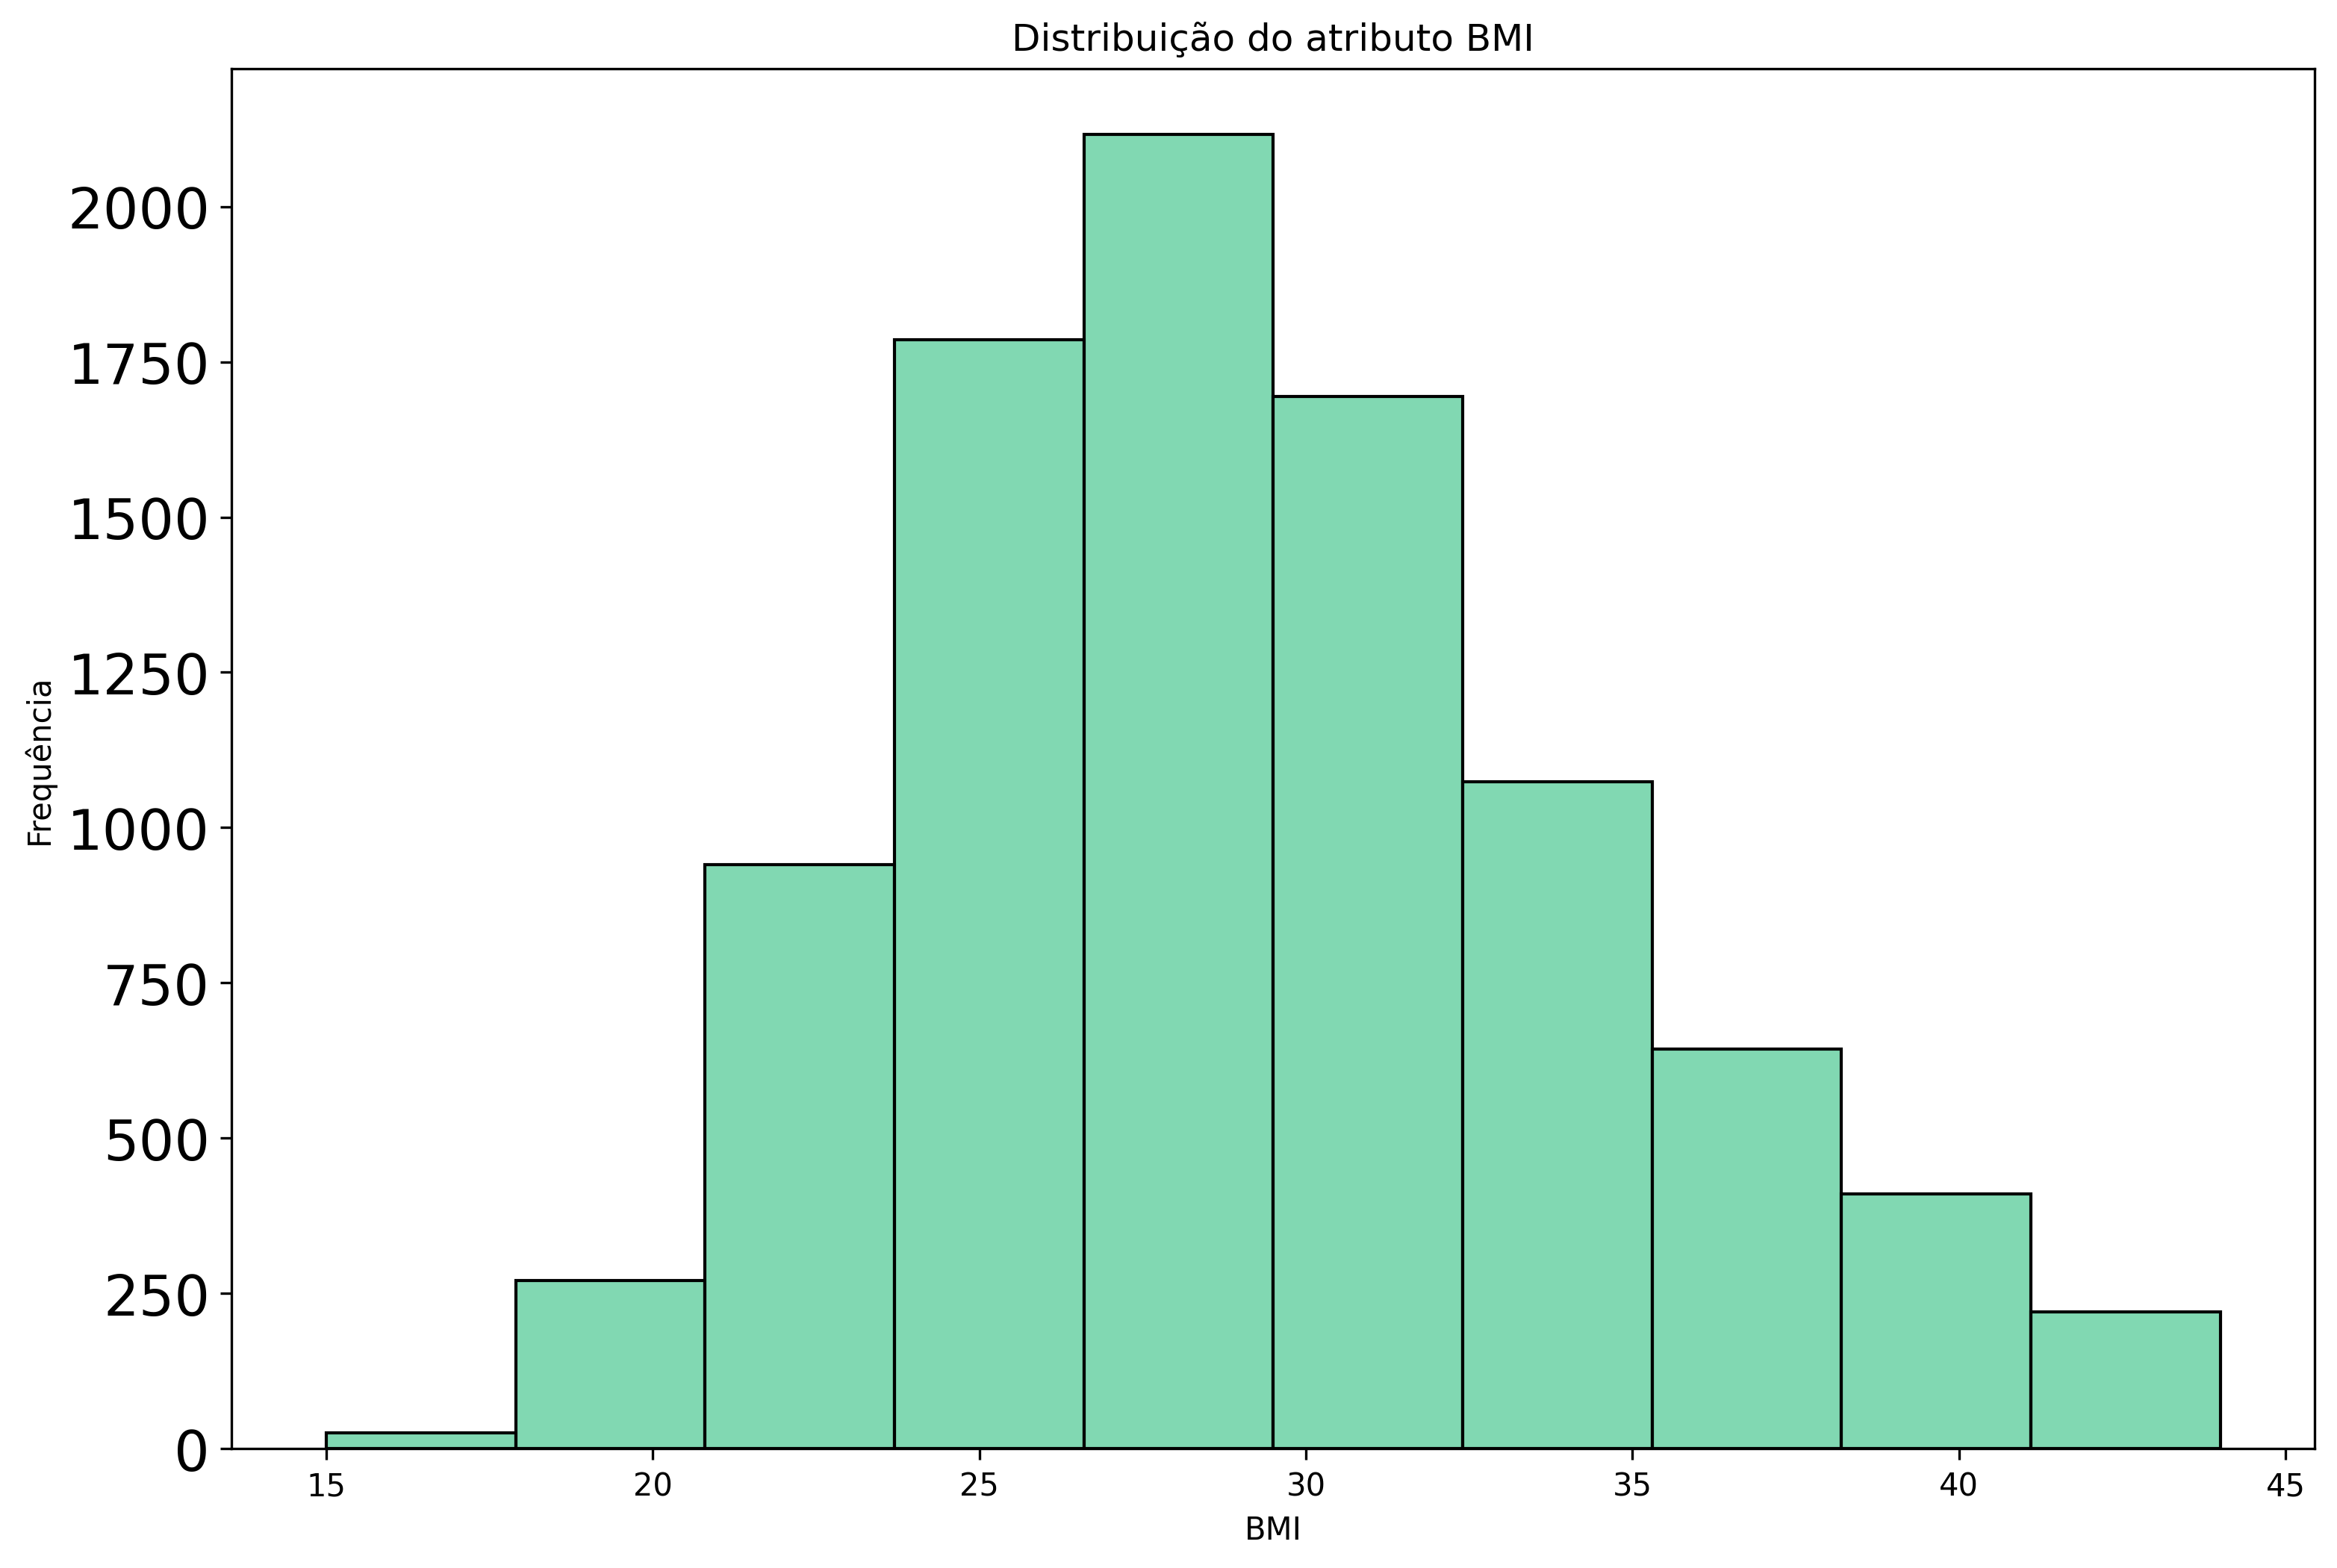

In [54]:
# TERCEIRO PASSO: BALANCEAMENTO DOS ATRIBUTOS NÃO BINÁRIOS

df_atributos_nbin = df_balanceado_bin[atributos_nbin]

# Loop sobre todas as colunas de atributos nbin
for coluna in df_atributos_nbin.columns:

    plt.figure(figsize=(12, 8), dpi=300)
    sns.countplot(data=df_atributos_nbin, x=df_atributos_nbin[coluna], palette=paleta)
    plt.title(f"Distribuição do atributo {coluna}", fontsize=25)
    plt.xlabel(f"{coluna}")
    plt.ylabel("Contagem")
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.savefig(f'contagem_atributo_{coluna}.png',dpi=300)

plt.figure(figsize=(12, 8), dpi=300)
sns.histplot(df_atributos_nbin['BMI'], bins=10, kde=False, color='#57cc99')  # kde=False mostra só o histograma
plt.title("Distribuição do atributo BMI")
plt.xlabel("BMI")
plt.ylabel("Frequência")
plt.yticks(fontsize=18)
plt.savefig('contagem_atributo_bmi_freq.png',dpi=300)

In [55]:
# Removendo atributos não binários desbalanceados

bin_remove = ['MentHlth', 'PhysHlth','Education', 'Income']

df_balanceado = df_balanceado_bin.drop(columns=bin_remove)

# BALANCEAMENTO CONCLUIDO
df_balanceado.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity',
       'Fruits', 'Veggies', 'GenHlth', 'Sex', 'Age'],
      dtype='object')

# SEPARAÇÃO DOS TRIBUTOS

In [56]:
# Atributos não binários
atributos_nbin=['Diabetes_012','BMI', 'GenHlth','Age']
df_atributos_nbin = df_balanceado[atributos_nbin]

X = df_atributos_nbin.iloc[:,1:4]
# Definindo o vetor classe
y = df_atributos_nbin.iloc[:,0]

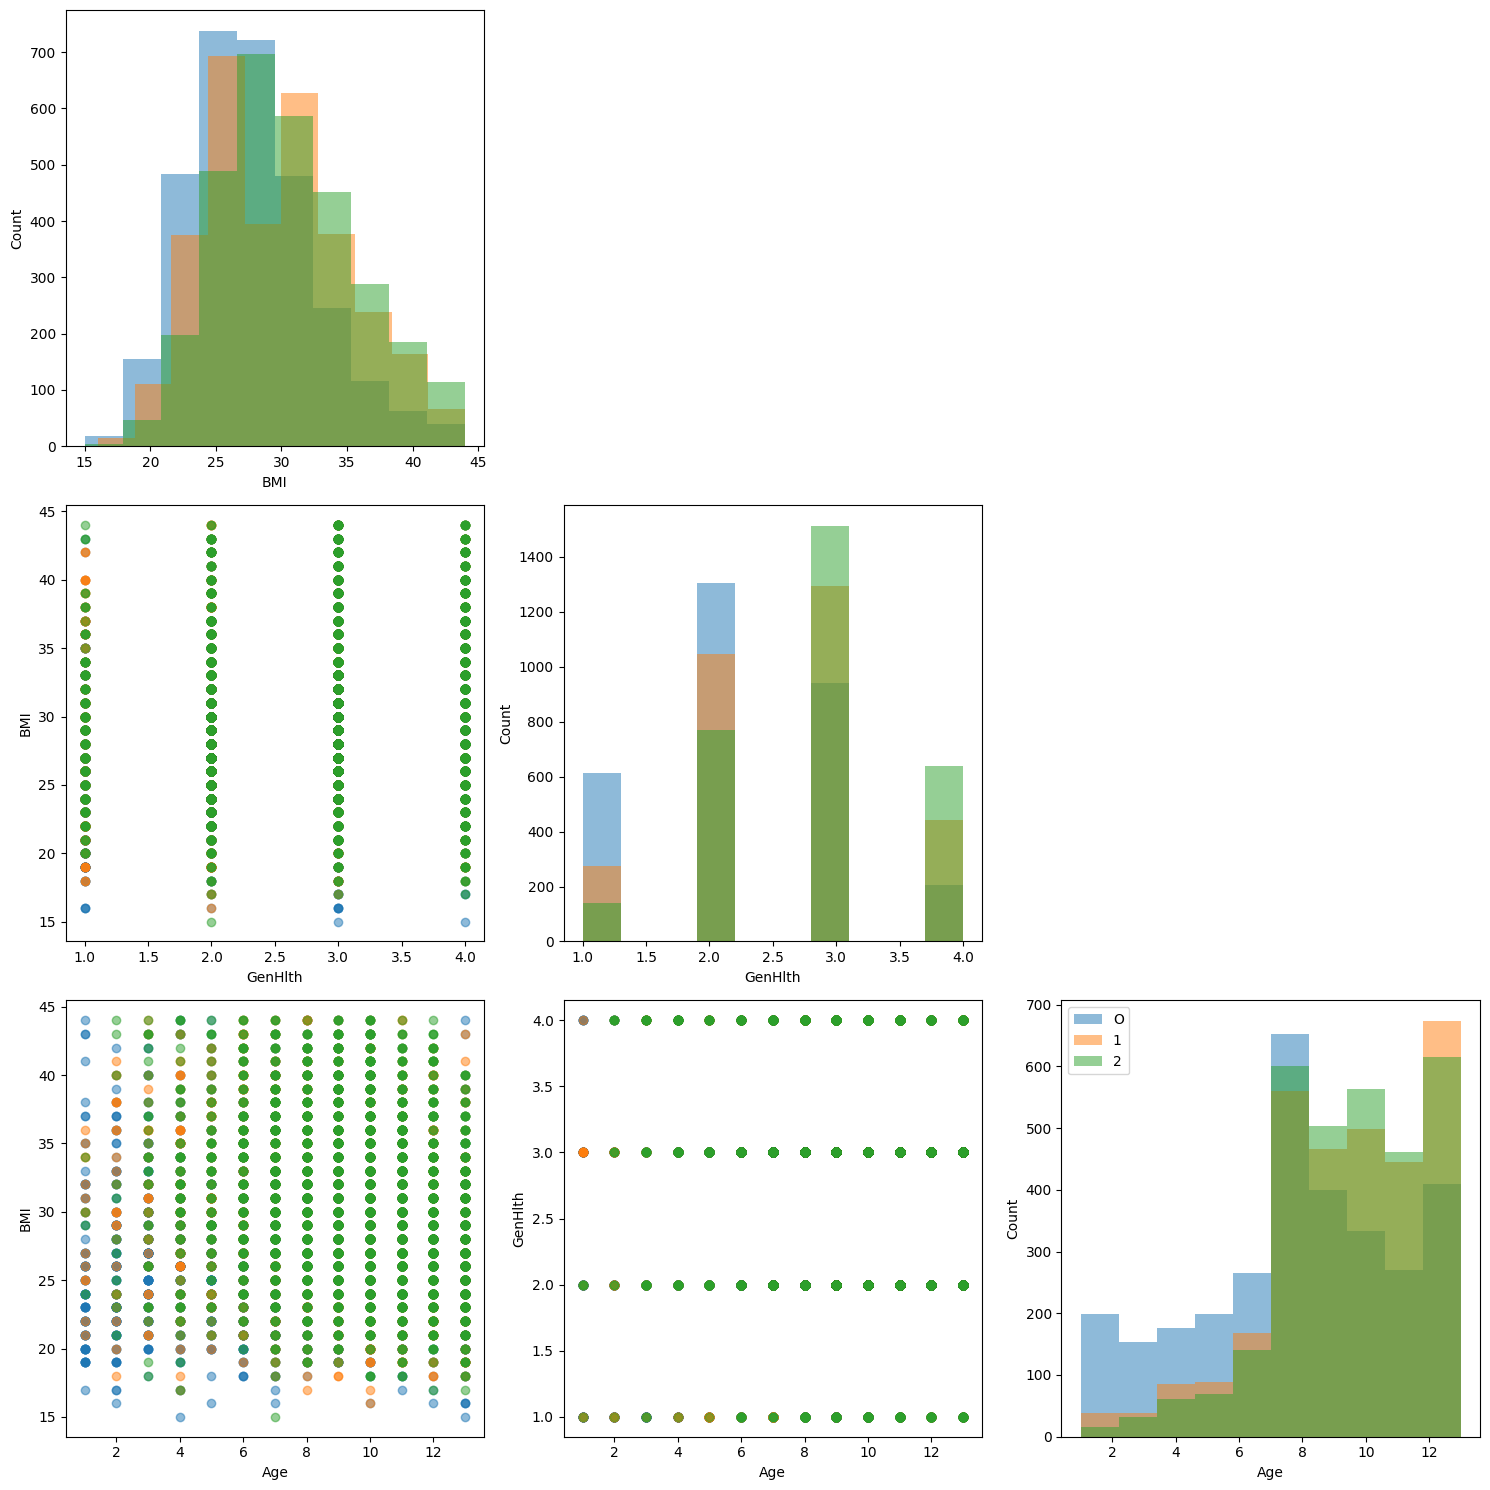

In [57]:
names = df_atributos_nbin.columns[1:]
fig,axes = scatterplotmatrix(X[y==0].values, figsize=(15, 15), alpha=0.5)
fig,axes = scatterplotmatrix(X[y==1].values, fig_axes=(fig, axes), alpha=0.5)
fig,axes = scatterplotmatrix(X[y==2].values, fig_axes=(fig, axes), alpha=0.5, names=names)

plt.tight_layout()
plt.legend(labels=['O', '1', '2'])
plt.savefig('distribuicao_colunas.png',dpi=300)
plt.show()

In [58]:
# Atributos binários
# Frequência relativa por classe

cros_HighBP = pd.crosstab(df_balanceado['HighBP'], df_balanceado['Diabetes_012'], normalize='index')
cros_HighChol = pd.crosstab(df_balanceado['HighChol'], df_balanceado['Diabetes_012'], normalize='index')
cros_Smoker = pd.crosstab(df_balanceado['Smoker'], df_balanceado['Diabetes_012'], normalize='index')
cros_PhysActivity = pd.crosstab(df_balanceado['PhysActivity'], df_balanceado['Diabetes_012'], normalize='index')
cros_Fruits = pd.crosstab(df_balanceado['Fruits'], df_balanceado['Diabetes_012'], normalize='index')
cros_VeggiesFruits = pd.crosstab(df_balanceado['Veggies'], df_balanceado['Diabetes_012'], normalize='index')
cros_Sex = pd.crosstab(df_balanceado['Sex'], df_balanceado['Diabetes_012'], normalize='index')

print(cros_HighBP)
print(cros_HighChol)
print(cros_Smoker)
print(cros_PhysActivity)
print(cros_Fruits)
print(cros_VeggiesFruits)
print(cros_Sex)

Diabetes_012       0.0       1.0       2.0
HighBP                                    
0.0           0.479172  0.299327  0.221502
1.0           0.220267  0.359698  0.420035
Diabetes_012       0.0       1.0       2.0
HighChol                                  
0.0           0.449255  0.290750  0.259995
1.0           0.234403  0.369675  0.395922
Diabetes_012       0.0       1.0       2.0
Smoker                                    
0.0           0.353048  0.333937  0.313015
1.0           0.310050  0.332621  0.357330
Diabetes_012       0.0       1.0       2.0
PhysActivity                              
0.0           0.268822  0.349638  0.381540
1.0           0.355543  0.327720  0.316737
Diabetes_012       0.0       1.0       2.0
Fruits                                    
0.0           0.331363  0.317286  0.351351
1.0           0.334577  0.343461  0.321962
Diabetes_012       0.0       1.0       2.0
Veggies                                   
0.0           0.313765  0.323381  0.362854
1.0        

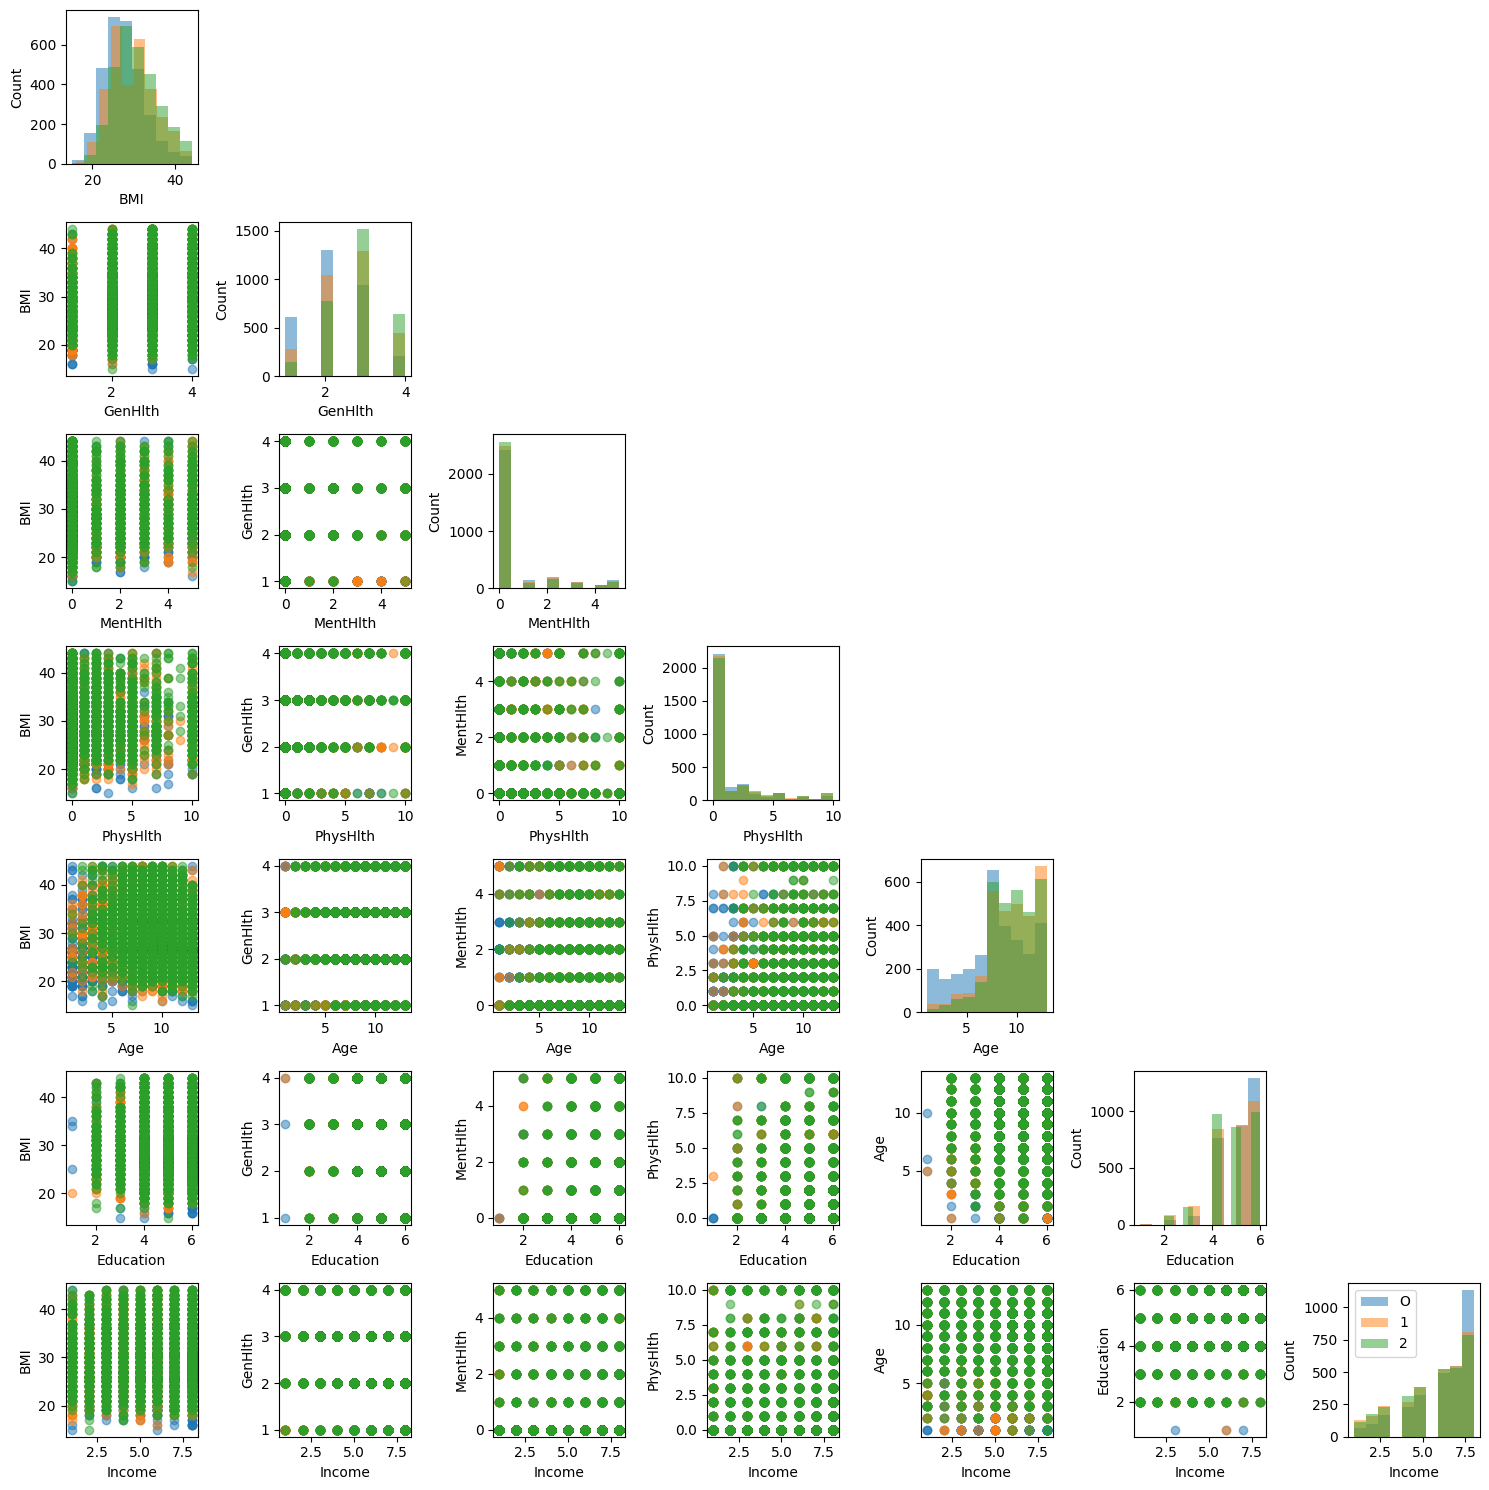

In [59]:
# Verificando a separação sem balanceamento de atributos
# Atributos não binários
atributos_nbin_prev = ['Diabetes_012','BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']
df_atributos_nbin_prev = df_classes_under[atributos_nbin_prev]

X_prev = df_atributos_nbin_prev.iloc[:,1:8]
# Definindo o vetor classe
y_prev = df_atributos_nbin_prev.iloc[:,0]

names = df_atributos_nbin_prev.columns[1:]
fig,axes = scatterplotmatrix(X_prev[y_prev==0].values, figsize=(15, 15), alpha=0.5)
fig,axes = scatterplotmatrix(X_prev[y_prev==1].values, fig_axes=(fig, axes), alpha=0.5)
fig,axes = scatterplotmatrix(X_prev[y_prev==2].values, fig_axes=(fig, axes), alpha=0.5, names=names)

plt.tight_layout()
plt.legend(labels=['O', '1', '2'])
plt.savefig('distribuicao_colunas_sem_balanceamento.png',dpi=300)
plt.show()

In [61]:
#Sem balanceamento
cros_HighBP = pd.crosstab(df_classes_under['HighBP'], df_balanceado['Diabetes_012'], normalize='index')
cros_HighChol = pd.crosstab(df_classes_under['HighChol'], df_balanceado['Diabetes_012'], normalize='index')
cros_Smoker = pd.crosstab(df_classes_under['Smoker'], df_balanceado['Diabetes_012'], normalize='index')
cros_PhysActivity = pd.crosstab(df_classes_under['PhysActivity'], df_balanceado['Diabetes_012'], normalize='index')
cros_Fruits = pd.crosstab(df_classes_under['Fruits'], df_balanceado['Diabetes_012'], normalize='index')
cros_Veggies = pd.crosstab(df_classes_under['Veggies'], df_balanceado['Diabetes_012'], normalize='index')
cros_Sex = pd.crosstab(df_classes_under['Sex'], df_balanceado['Diabetes_012'], normalize='index')
cros_CholCheck = pd.crosstab(df_classes_under['CholCheck'], df_balanceado['Diabetes_012'], normalize='index')
cros_HvyAlcoholConsump = pd.crosstab(df_classes_under['HvyAlcoholConsump'], df_balanceado['Diabetes_012'], normalize='index')
cros_AnyHealthcare = pd.crosstab(df_classes_under['AnyHealthcare'], df_balanceado['Diabetes_012'], normalize='index')
cros_NoDocbcCost = pd.crosstab(df_classes_under['NoDocbcCost'], df_balanceado['Diabetes_012'], normalize='index')
cros_DiffWalk = pd.crosstab(df_classes_under['DiffWalk'], df_balanceado['Diabetes_012'], normalize='index')
cros_Stroke = pd.crosstab(df_classes_under['Stroke'], df_balanceado['Diabetes_012'], normalize='index')
cros_HeartDiseaseorAttack = pd.crosstab(df_classes_under['HeartDiseaseorAttack'], df_balanceado['Diabetes_012'], normalize='index')

print(cros_HighBP)
print(cros_HighChol)
print(cros_Smoker)
print(cros_PhysActivity)
print(cros_Fruits)
print(cros_Veggies)
print(cros_Sex)
print(cros_CholCheck)
print(cros_HvyAlcoholConsump)
print(cros_AnyHealthcare)
print(cros_NoDocbcCost)
print(cros_DiffWalk)
print(cros_Stroke)
print(cros_HeartDiseaseorAttack)

Diabetes_012       0.0       1.0       2.0
HighBP                                    
0.0           0.479172  0.299327  0.221502
1.0           0.220267  0.359698  0.420035
Diabetes_012       0.0       1.0       2.0
HighChol                                  
0.0           0.449255  0.290750  0.259995
1.0           0.234403  0.369675  0.395922
Diabetes_012       0.0       1.0       2.0
Smoker                                    
0.0           0.353048  0.333937  0.313015
1.0           0.310050  0.332621  0.357330
Diabetes_012       0.0       1.0       2.0
PhysActivity                              
0.0           0.268822  0.349638  0.381540
1.0           0.355543  0.327720  0.316737
Diabetes_012       0.0       1.0       2.0
Fruits                                    
0.0           0.331363  0.317286  0.351351
1.0           0.334577  0.343461  0.321962
Diabetes_012       0.0       1.0       2.0
Veggies                                   
0.0           0.313765  0.323381  0.362854
1.0        

In [67]:
df_balanceado.to_csv("data_balanceado.csv", index=False)

In [69]:
df = pd.read_csv("data_balanceado.csv")
df

,Diabetes_012,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,Sex,Age
0,2.0,1.0,0.0,32.0,0.0,1.0,1.0,1.0,1.0,0.0,9.0
1,0.0,0.0,1.0,27.0,0.0,1.0,1.0,1.0,3.0,0.0,6.0
2,1.0,1.0,1.0,27.0,1.0,1.0,0.0,1.0,3.0,0.0,11.0
3,0.0,1.0,1.0,26.0,0.0,1.0,1.0,0.0,1.0,1.0,11.0
4,0.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,3.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
9175,1.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,2.0,1.0,10.0
9176,1.0,0.0,1.0,29.0,0.0,1.0,1.0,1.0,3.0,1.0,10.0
9177,1.0,1.0,1.0,36.0,0.0,1.0,0.0,0.0,3.0,0.0,10.0
9178,0.0,0.0,0.0,20.0,1.0,1.0,1.0,1.0,2.0,0.0,8.0
